<a href="https://colab.research.google.com/github/JaapVanKaKa/ZZ/blob/main/ccccccccCopy_of_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. **U.S. Bond Yields**: Particularly the yield on the 10-year U.S. Treasury note. As bond yields rise, equities can become less attractive, and vice versa.

3. **Currency Movements**: The strength of the U.S. dollar can influence multinational companies in the S&P 500. A stronger dollar can reduce overseas earnings when they're translated back into dollars.

4. **Commodity Prices**: Especially oil prices, given the significance of energy companies within the index. Higher oil prices can benefit energy companies but might increase costs for other industries.

8. **Investor Sentiment**: Various measures of investor confidence or sentiment can impact stock markets, including the S&P 500. **VIX (Volatility Index)**: Often referred to as the "fear index", the VIX measures expected volatility of the S&P 500. A rising VIX can indicate increasing uncertainty or fear among investors.
https://finance.yahoo.com/quote/%5EVIX?p=^VIX&.tsrc=fin-srch

High VIX (e.g., above 20): This suggests higher expected volatility, often associated with a more uncertain or bearish market sentiment. It may imply that investors are more concerned about potential market downturns.

Low VIX (e.g., below 20): This suggests lower expected volatility, often associated with a more stable or bullish market sentiment. It may imply that investors are relatively confident about market stability.

10. **Emerging Market Performance**: Although you mentioned Asian and European indices, the performance of emerging markets can also correlate with the S&P 500, especially if there are global macroeconomic concerns.

# Plotting

[*********************100%%**********************]  1 of 1 completed


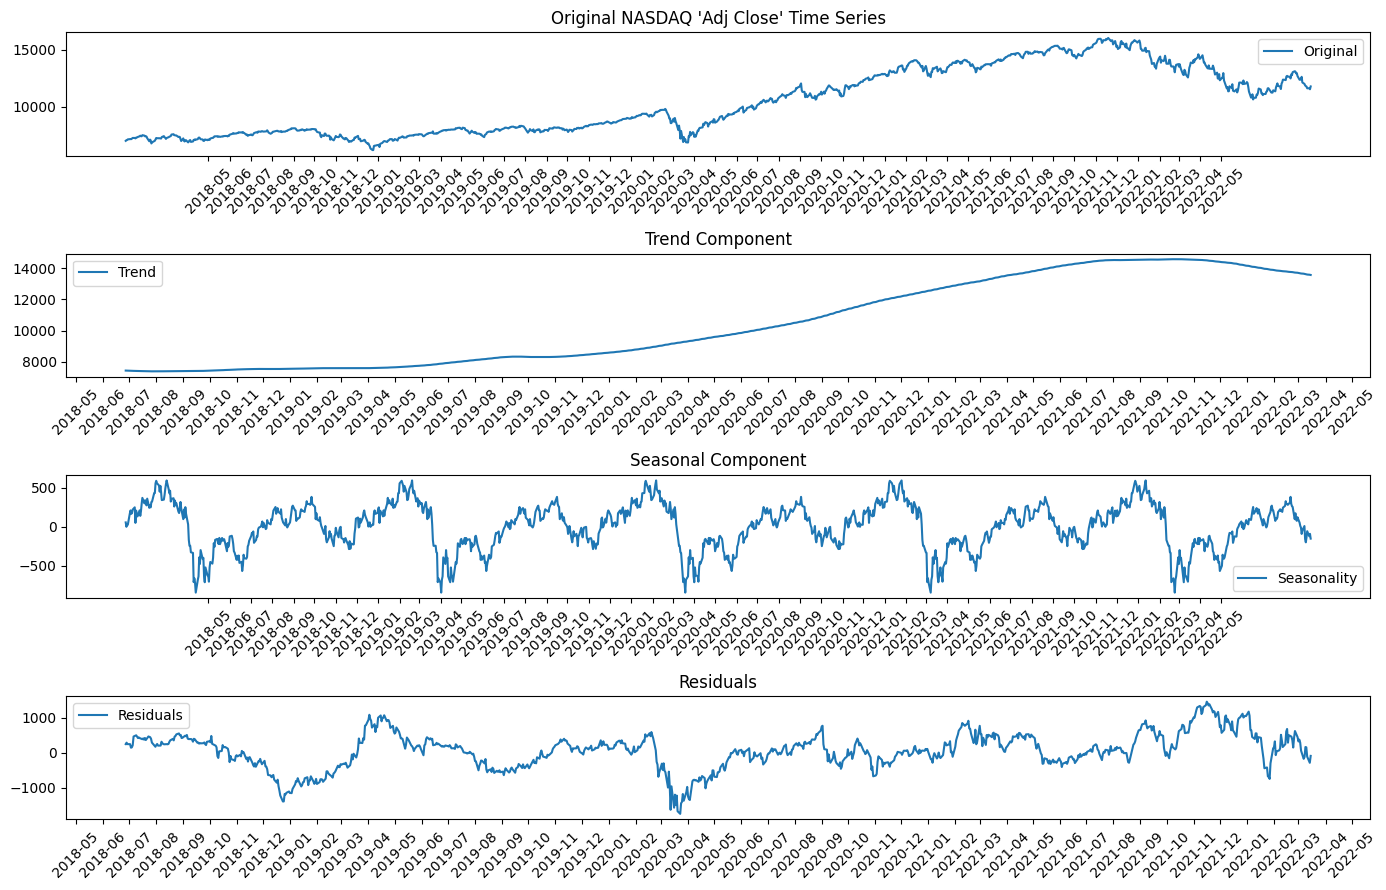

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Download NASDAQ data
nasdaq = yf.download('^IXIC', start='2018-01-01', end='2023-11-10')

# Delete columns 'Open', 'High', 'Low', and 'Close'
nasdaq = nasdaq.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business daily frequency and forward fill missing values
nasdaq = nasdaq['Adj Close'].asfreq('B').ffill()

# Split the data into training and testing sets
split_index = int(len(nasdaq) * 0.8)
train_data = nasdaq[:split_index]

# Decomposing the time series
decomposition = seasonal_decompose(train_data, model='additive', period=252)  # Assuming annual seasonality

# Extracting the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the original time series and its components
plt.figure(figsize=(14, 9))

# Define the date format
date_format = mdates.DateFormatter('%Y-%m')

# Create a locator for every month
locator = mdates.MonthLocator()

# Original Data
ax1 = plt.subplot(411)
ax1.plot(train_data, label='Original')
ax1.legend(loc='best')
ax1.set_title("Original NASDAQ 'Adj Close' Time Series")
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(date_format)

# Trend Component
ax2 = plt.subplot(412)
ax2.plot(trend, label='Trend')
ax2.legend(loc='best')
ax2.set_title("Trend Component")
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(date_format)

# Seasonal Component
ax3 = plt.subplot(413)
ax3.plot(seasonal, label='Seasonality')
ax3.legend(loc='best')
ax3.set_title("Seasonal Component")
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(date_format)

# Residuals
ax4 = plt.subplot(414)
ax4.plot(residual, label='Residuals')
ax4.legend(loc='best')
ax4.set_title("Residuals")
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(date_format)

# Rotate the x-axis labels for better visibility
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# Improve the spacing and show the plot with tight layout
plt.tight_layout()
plt.show()



In the seasonality subplot of your decomposition, there appears to be a repeating pattern that fluctuates regularly over time. This indicates that there is indeed some seasonality in your NASDAQ 'Adjusted Close' time series data.

The regular up-and-down swings suggest that the NASDAQ index experiences regular fluctuations that repeat over a fixed period. These could be related to various seasonal factors such as quarterly financial reports, fiscal policies that follow a yearly cycle, or investor behavior patterns that tend to repeat at certain times of the year.

The clear pattern in the seasonality plot implies that the seasonal component has been successfully extracted from the data, showing that seasonality is a significant feature of the NASDAQ index over this time period. The amplitude of the seasonal fluctuations provides a sense of how much of the variation in the data can be attributed to seasonal effects.

From the residuals plot provided, here's what can be inferred:

No Clear Pattern: If the residuals appear as a stable, centered band around zero without any discernible pattern, it would suggest that the model has done a good job in capturing the underlying structure of the data, and what's left is essentially random noise.

Volatility Clusters: If there are periods where the residuals show increased variability (clusters of high and low values), this might indicate volatility clustering, which is common in financial time series. Models like GARCH are specifically designed to capture such effects.

Outliers or Sharp Spikes: Any significant spikes or dips might represent outliers or events that the model failed to capture. It’s important to investigate such deviations further as they could be indicative of special events affecting the market, such as economic announcements, policy changes, or other external factors.

Zero Line Fluctuation: If the residuals fluctuate above and below the zero line in a consistent manner, this could suggest that some cyclical patterns have not been fully captured by the seasonal component of the model.

Mean Level: If the residuals have a mean significantly different from zero, this could suggest a bias in the model where the trend or seasonal components are either overestimating or underestimating the true values.

In [ ]:
# Assuming 'seasonal' is the seasonal component extracted from the time series
seasonal = decomposition.seasonal

# Find the index (date) of the highest and lowest seasonal effect
max_seasonal_idx = seasonal.idxmax()
min_seasonal_idx = seasonal.idxmin()

# Get the corresponding months
max_seasonal_month = max_seasonal_idx.month_name()
min_seasonal_month = min_seasonal_idx.month_name()

print(f"The month with the highest peak in price is: {max_seasonal_month}")
print(f"The month with the lowest price is: {min_seasonal_month}")


The month with the highest peak in price is: March
The month with the lowest price is: April


In [ ]:
# Assuming 'seasonal' is your seasonal component as a pandas Series
# Find the top 2 months with the highest seasonal effect
top2_peaks = seasonal.nlargest(2)

# Find the top 2 months with the lowest seasonal effect
top2_troughs = seasonal.nsmallest(2)

print("Top 2 months with highest seasonal effect:")
print(top2_peaks)

print("\nTop 2 months with lowest seasonal effect:")
print(top2_troughs)


Top 2 months with highest seasonal effect:
Date
2018-03-02    591.189376
2019-02-19    591.189376
Freq: 252B, Name: seasonal, dtype: float64

Top 2 months with lowest seasonal effect:
Date
2018-04-13   -842.489812
2019-04-02   -842.489812
Freq: 252B, Name: seasonal, dtype: float64


### p,d,q Values

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.6 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pmdarima as pm
import pandas as pd

# Download SPX500 data
spx500 = yf.download('^GSPC', start='2018-01-01', end='2023-11-02')

# Delete unnecessary columns
spx500 = spx500.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business days (B)
spx500 = spx500.asfreq('B')

# Forward fill missing values
spx500 = spx500.ffill()

# Extract the 'Adj Close' column for modeling
data = spx500['Adj Close']

# Find best parameters using auto_arima
model = pm.auto_arima(data, seasonal=False, suppress_warnings=True)

# Print the optimal parameters
print("Optimal p, d, q values:", model.order)

[*********************100%%**********************]  1 of 1 completed
Optimal p, d, q values: (2, 1, 2)


In [ ]:
import yfinance as yf
import pmdarima as pm
import pandas as pd

# Download NASDAQ Composite data
nasdaq = yf.download('^IXIC', start='2018-01-01', end='2023-11-02')

# Delete unnecessary columns
nasdaq = nasdaq.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business days (B)
nasdaq = nasdaq.asfreq('B')

# Forward fill missing values
nasdaq = nasdaq.ffill()

# Extract the 'Adj Close' column for modeling
data = nasdaq['Adj Close']

# Find best parameters using auto_arima
model = pm.auto_arima(data, seasonal=False, suppress_warnings=True)

# Print the optimal parameters
print("Optimal p, d, q values:", model.order)


[*********************100%%**********************]  1 of 1 completed
Optimal p, d, q values: (1, 1, 0)


In [ ]:
import yfinance as yf
import pmdarima as pm
import pandas as pd

# Download Euro Stoxx 50 data
euro50 = yf.download('^STOXX50E', start='2018-01-01', end='2023-11-02')

# Delete unnecessary columns
euro50 = euro50.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business days (B)
euro50 = euro50.asfreq('B')

# Forward fill missing values
euro50 = euro50.ffill()

# Extract the 'Adj Close' column for modeling
data = euro50['Adj Close']

# Find best parameters using auto_arima
model = pm.auto_arima(data, seasonal=False, suppress_warnings=True)

# Print the optimal parameters
print("Optimal p, d, q values:", model.order)


[*********************100%%**********************]  1 of 1 completed
Optimal p, d, q values: (0, 1, 0)


In [ ]:
import yfinance as yf
import pmdarima as pm
import pandas as pd

# Download Hang Seng Index data
hsi = yf.download('^HSI', start='2018-01-01', end='2023-11-02')

# Delete unnecessary columns
hsi = hsi.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business days (B)
hsi = hsi.asfreq('B')

# Forward fill missing values
hsi = hsi.ffill()

# Extract the 'Adj Close' column for modeling
data = hsi['Adj Close']

# Find best parameters using auto_arima
model = pm.auto_arima(data, seasonal=False, suppress_warnings=True)

# Print the optimal parameters
print("Optimal p, d, q values:", model.order)


[*********************100%%**********************]  1 of 1 completed
Optimal p, d, q values: (0, 1, 0)


In [ ]:
import yfinance as yf
import pmdarima as pm
import pandas as pd

# Download ASX 200 data
asx200 = yf.download('^AXJO', start='2018-01-01', end='2023-11-03')

# Delete unnecessary columns
asx200 = asx200.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business days (B)
asx200 = asx200.asfreq('B')

# Forward fill missing values
asx200 = asx200.ffill()

# Extract the 'Adj Close' column for modeling
data = asx200['Adj Close']

# Find best parameters using auto_arima
model = pm.auto_arima(data, seasonal=False, suppress_warnings=True)

# Print the optimal parameters
print("Optimal p, d, q values:", model.order)


[*********************100%%**********************]  1 of 1 completed
Optimal p, d, q values: (2, 1, 2)


In [ ]:
import yfinance as yf
import pmdarima as pm
import pandas as pd

# Download Nikkei 225 data
nikkei225 = yf.download('^N225', start='2018-01-01', end='2023-11-02')

# Delete unnecessary columns
nikkei225 = nikkei225.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business days (B)
nikkei225 = nikkei225.asfreq('B')

# Forward fill missing values
nikkei225 = nikkei225.ffill()

# Extract the 'Adj Close' column for modeling
data = nikkei225['Adj Close']

# Find best parameters using auto_arima
model = pm.auto_arima(data, seasonal=False, suppress_warnings=True)

# Print the optimal parameters
print("Optimal p, d, q values:", model.order)


[*********************100%%**********************]  1 of 1 completed
Optimal p, d, q values: (2, 1, 2)


# Correlation Coefficients

 ASX 200 (^AXJO) has the highest positive correlation with the S&P 500

In [ ]:
import yfinance as yf
import pandas as pd

# Define the tickers for the indices
# Note: The ticker symbols might vary based on the data provider.
# Here, we're using Yahoo Finance's symbols.
tickers = {
    'Japan': '^N225',   # Nikkei 225
    'US500': '^GSPC',   # S&P 500
    'AUS': '^AXJO',     # ASX 200
    'China': '000001.SS', # Shanghai Composite
    'HK': '^HSI'       # Hang Seng Index
}

# Fetch data
start_date = '2020-01-01'  # You can modify this as per your requirements
end_date = '2023-09-25'
data = yf.download(list(tickers.values()), start=start_date, end=end_date)['Adj Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Compute correlation
correlations = returns.corr()

# Extract the correlations with US500
us500_correlations = correlations['^GSPC']

print(us500_correlations)



[*********************100%%**********************]  5 of 5 completed
000001.SS    0.151307
^AXJO        0.408408
^GSPC        1.000000
^HSI         0.192107
^N225        0.233783
Name: ^GSPC, dtype: float64


000001.SS: 0.209064

This represents the correlation between the Shanghai Composite Index (China) and the S&P 500.
A value of 0.209064 indicates a low positive correlation. This means that there's a slight tendency for the Shanghai Composite and the S&P 500 to move in the same direction, but it's not very strong.
^AXJO: 0.525597

This is the correlation between the ASX 200 (Australia) and the S&P 500.
A value of 0.525597 indicates a moderate positive correlation. When the S&P 500 goes up, the ASX 200 tends to go up as well, and vice versa. However, this correlation is not extremely strong, so there are other factors at play.
^GSPC: 1.000000

This is the S&P 500's correlation with itself. Any index (or any series) will always have a perfect correlation of 1 with itself.
^HSI: 0.293169

This is the correlation between the Hang Seng Index (Hong Kong) and the S&P 500.
A value of 0.293169 indicates a low positive correlation. The movements of the Hang Seng Index and the S&P 500 are somewhat related, but other factors significantly influence each market's movements.
^N225: 0.268067

This is the correlation between the Nikkei 225 (Japan) and the S&P 500.
A value of 0.268067 suggests a low positive correlation. The Nikkei 225 and the S&P 500 somewhat tend to move in the same direction, but it's not a strong relationship.
In summary:

All the indices in this output have a positive correlation with the S&P 500, meaning they tend to move in the same direction as the S&P 500.
Among them, the ASX 200 (^AXJO) has the highest positive correlation with the S&P 500, while the Shanghai Composite (000001.SS) has the lowest.
Remember that these correlation values are for the specific date range you've analyzed, and correlations can change based on different time periods. Additionally, correlation doesn't imply causation, so these numbers only show a statistical relationship without explaining why they move in such a manner.

In [ ]:
pip install alpha_vantage pandas


In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from statsmodels.tsa.arima.model import ARIMA

# Replace with your Alpha Vantage API key
ALPHA_VANTAGE_API_KEY = 'your_alpha_vantage_api_key'

# Initialize the TimeSeries class with your key and the output format
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

def process_index_data_alpha_vantage(symbol, api_key):
    # Fetching only the last 100 data points (compact view)
    data, meta_data = ts.get_daily_adjusted(symbol, outputsize='compact')
    # Keep only the adjusted close column
    data = data['5. adjusted close']
    # Resampling the data to fill missing business days if necessary
    data = data.asfreq('B')
    data = data.ffill()
    return data

def make_predictions(data, order, prediction_dates):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    predictions = model_fit.get_forecast(steps=len(prediction_dates))
    prediction_series = predictions.summary_frame()['mean']
    prediction_series.index = prediction_dates
    return prediction_series

# Prediction Dates
prediction_dates = pd.date_range(start='2023-11-03', periods=5, freq='B')

# Tickers for the indices and their corresponding ARIMA orders
# Replace the symbols with the actual Alpha Vantage symbols for the indices
indices = {
    'Nikkei 225': ('NIKKEI', (2, 1, 2)),
    'S&P/ASX 200': ('ASX', (2, 1, 2)),
    'Hang Seng': ('HANG_SENG', (0, 1, 0)),
    'EURO STOXX 50': ('STOXX50', (0, 1, 0)),
    'S&P 500': ('SPX', (2, 1, 2)),
    'NASDAQ': ('NASDAQ', (1, 1, 0)),
    'Dow Jones Industrial Average': ('DJI', (1, 1, 0))
}

# Process data and make predictions for each index with the specified ARIMA order
for index_name, (symbol, order) in indices.items():
    try:
        index_data = process_index_data_alpha_vantage(symbol, ALPHA_VANTAGE_API_KEY)
        index_predictions = make_predictions(index_data, order, prediction_dates)
        print(f"{index_name} Predictions:")
        print(index_predictions)
        print()
    except ValueError as e:
        print(f"Error processing {index_name}: {e}")


ModuleNotFoundError: ignored

# Trading Hours

https://www.etoro.com/trading/market-hours-and-events/

To provide you with the trading hours of the major stock indices translated into German time (Central European Time/Central European Summer Time), we'll have to account for the different time zones and daylight saving time practices around the world. Here are the approximate trading hours in CET/Central European Summer Time (CEST):

**North America:**
1. **S&P 500, Dow Jones, NASDAQ (USA)**
   - NYSE and NASDAQ: 3:30 PM - 10:00 PM CET (Winter) / 3:30 PM - 10:00 PM CEST (Summer)

2. **S&P/TSX Composite (Canada)**
   - TSX: 3:30 PM - 10:00 PM CET (Winter) / 3:30 PM - 10:00 PM CEST (Summer)

**Europe:**
3. **FTSE 100 (UK)**
   - LSE: 9:00 AM - 5:30 PM CET (Winter) / 9:00 AM - 5:30 PM CEST (Summer)

4. **DAX (Germany)**
   - Frankfurt Stock Exchange: 9:00 AM - 5:30 PM CET / 9:00 AM - 5:30 PM CEST
   - Xetra: 9:00 AM - 5:30 PM CET / 9:00 AM - 5:30 PM CEST

5. **CAC 40 (France)**
   - Euronext Paris: 9:00 AM - 5:30 PM CET / 9:00 AM - 5:30 PM CEST

6. **Euro Stoxx 50 (Eurozone)**
   - Eurex: 8:00 AM - 10:00 PM CET / 8:00 AM - 10:00 PM CEST
   - Xetra (for German stocks): 9:00 AM - 5:30 PM CET / 9:00 AM - 5:30 PM CEST

**Asia/Pacific:**
7. **Nikkei 225 (Japan)**
   - TSE: 1:00 AM - 3:30 AM CET / 2:00 AM - 4:30 AM CEST (Morning session)
   - TSE: 4:30 AM - 7:00 AM CET / 5:30 AM - 8:00 AM CEST (Afternoon session)

8. **Hang Seng (Hong Kong)**
   - HKEx: 2:30 AM - 5:00 AM CET / 3:30 AM - 6:00 AM CEST (Morning session)
   - HKEx: 6:00 AM - 9:00 AM CET / 7:00 AM - 10:00 AM CEST (Afternoon session)

9. **Shanghai Composite (China)**
   - SSE: 2:30 AM - 5:30 AM CET / 3:30 AM - 6:30 AM CEST (Morning session)
   - SSE: 7:00 AM - 9:00 AM CET / 8:00 AM - 10:00 AM CEST (Afternoon session)

10. **S&P/ASX 200 (Australia)**
    - ASX: 12:00 AM - 6:00 AM CET (Winter) / 2:00 AM - 8:00 AM CEST (Summer)

Note: These times can vary, especially during the transitions into and out of daylight saving time, as not all countries shift on the same dates. Always verify the current local times with an official source.

# BASF

[*********************100%%**********************]  1 of 1 completed


BASF Predictions from 2024-06-06 to 2025-06-15:
2024-06-06    12.582593
2024-06-07    12.576642
2024-06-10    12.579453
2024-06-11    12.578125
2024-06-12    12.578753
2024-06-13    12.578456
2024-06-14    12.578596
Freq: B, Name: predicted_mean, dtype: float64



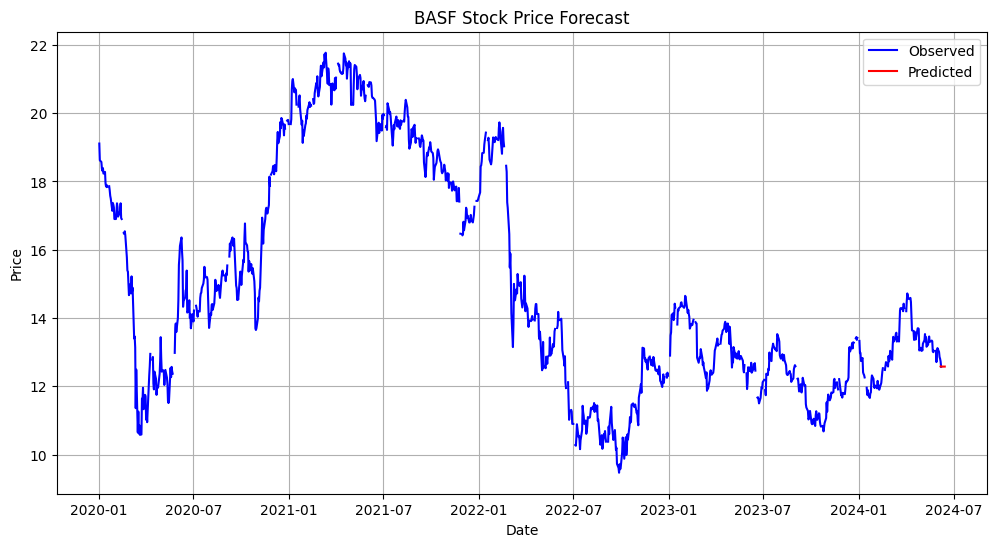

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def process_index_data(ticker, start_date, end_date):
    """Fetch and preprocess stock index data."""
    data = yf.download(ticker, start=start_date, end=end_date)
    prices = data['Close'].dropna()
    prices.index = pd.to_datetime(prices.index)  # Ensure index is datetime
    prices = prices.asfreq('B')  # Set frequency to business days
    return prices

def make_predictions(prices, order, forecast_start, forecast_end):
    """Fit an ARIMA model and make predictions over a specified range."""
    prices_log = np.log(prices)
    model = ARIMA(prices_log, order=order)
    fitted_model = model.fit()
    forecast_dates = pd.date_range(start=forecast_start, end=forecast_end, freq='B')
    forecast = fitted_model.predict(start=len(prices_log), end=len(prices_log) + len(forecast_dates) - 1)
    forecast.index = forecast_dates  # Assign proper dates to the forecast
    forecast = np.exp(forecast)  # Convert back from log
    return forecast, prices

indices = {"BASF": ("BASFY", (1, 1, 1))}
start_date = '2020-01-01'
end_date = '2024-06-09'

for index_name, (ticker, order) in indices.items():
    index_data = process_index_data(ticker, start_date, end_date)
    predictions, historical_data = make_predictions(index_data, order, '2024-06-06', '2024-06-15')
    print(f"{index_name} Predictions from 2024-06-06 to 2025-06-15:")
    print(predictions)
    print()

    # Plotting observed and predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(historical_data, label='Observed', color='blue')
    plt.plot(predictions, label='Predicted', color='red')
    plt.title(f'{index_name} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()





# All In One

In [3]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Function to download and process data for a given index
def process_index_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    data = data.asfreq('D')
    data = data.asfreq('B')
    data = data.ffill()
    return data['Adj Close']

# Function to split data into training and test sets (placeholder, implement accordingly)
def split_data(data, train_ratio=0.8):
    # Split the data according to the train_ratio
    train_size = int(len(data) * train_ratio)
    train_data = data[:train_size]
    test_data = data[train_size:]
    return train_data, test_data

# Function to fit ARIMA model and make predictions with specified order
def make_predictions(data, order, start_date, end_date):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=start_date, end=end_date)
    return predictions

# Dates
start_date = '2018-01-01'
end_date = '2024-06-10'

# Tickers for the indices and their corresponding ARIMA orders
indices = {
    'Nikkei 225': ('^N225', (2, 1, 2)),
    'S&P/ASX 200': ('^AXJO', (2, 1, 2)),
    'Hang Seng': ('^HSI', (0, 1, 0)),
    'EURO STOXX 50': ('^STOXX50E', (0, 1, 0)),
    'S&P 500': ('^GSPC', (2, 1, 2)),
    'NASDAQ': ('^IXIC', (1, 1, 0)),
    # Assuming Dow Jones should use the default (1, 1, 0) as it's not specified
    'Dow Jones Industrial Average': ('^DJI', (1, 1, 0))
}

# Process data and make predictions for each index with the specified ARIMA order
for index_name, (ticker, order) in indices.items():
    index_data = process_index_data(ticker, start_date, end_date)
    index_predictions = make_predictions(index_data, order, '2024-06-06', '2024-06-15')
    print(f"{index_name} Predictions:")
    print(index_predictions)
    print()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Nikkei 225 Predictions:
2024-06-06    38491.438824
2024-06-07    38674.615168
2024-06-10    38694.772082
2024-06-11    38698.003040
2024-06-12    38697.396469
2024-06-13    38697.130372
2024-06-14    38697.159665
2024-06-17    38697.180457
Freq: B, Name: predicted_mean, dtype: float64




[*********************100%%**********************]  1 of 1 completed

S&P/ASX 200 Predictions:
2024-06-06    7754.959356
2024-06-07    7829.724191
2024-06-10    7858.460919
2024-06-11    7851.994911
2024-06-12    7860.587972
2024-06-13    7856.713965
2024-06-14    7853.426622
2024-06-17    7860.536185
Freq: B, Name: predicted_mean, dtype: float64

Hang Seng Predictions:
2024-06-06    18424.960938
2024-06-07    18476.800781
2024-06-10    18366.949219
2024-06-11    18366.949219
2024-06-12    18366.949219
2024-06-13    18366.949219
2024-06-14    18366.949219
2024-06-17    18366.949219
Freq: B, Name: predicted_mean, dtype: float64




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


EURO STOXX 50 Predictions:
2024-06-06    5035.660156
2024-06-07    5069.089844
2024-06-10    5051.310059
2024-06-11    5051.310059
2024-06-12    5051.310059
2024-06-13    5051.310059
2024-06-14    5051.310059
2024-06-17    5051.310059
Freq: B, Name: predicted_mean, dtype: float64



[*********************100%%**********************]  1 of 1 completed

S&P 500 Predictions:
2024-06-06    5352.108659
2024-06-07    5354.065640
2024-06-10    5347.191309
2024-06-11    5346.560395
2024-06-12    5347.484020
2024-06-13    5346.422534
2024-06-14    5347.470995
2024-06-17    5346.564246
Freq: B, Name: predicted_mean, dtype: float64




[*********************100%%**********************]  1 of 1 completed

NASDAQ Predictions:
2024-06-06    17162.466147
2024-06-07    17174.255457
2024-06-10    17136.204980
2024-06-11    17135.968656
2024-06-12    17135.986823
2024-06-13    17135.985427
2024-06-14    17135.985534
2024-06-17    17135.985526
Freq: B, Name: predicted_mean, dtype: float64

Dow Jones Industrial Average Predictions:
2024-06-06    38797.919834
2024-06-07    38878.448092
2024-06-10    38807.529062
2024-06-11    38806.692380
2024-06-12    38806.774344
2024-06-13    38806.766315
2024-06-14    38806.767101
2024-06-17    38806.767024
Freq: B, Name: predicted_mean, dtype: float64



# Naive Prediction (SNOW)

                             Observed   Predicted
Date                                             
2024-05-01 00:00:00-04:00  156.139999         NaN
2024-05-02 00:00:00-04:00  157.770004  156.139999
2024-05-03 00:00:00-04:00  159.320007  157.770004
2024-05-06 00:00:00-04:00  163.679993  159.320007
2024-05-07 00:00:00-04:00  159.089996  163.679993


<Axes: xlabel='Date'>

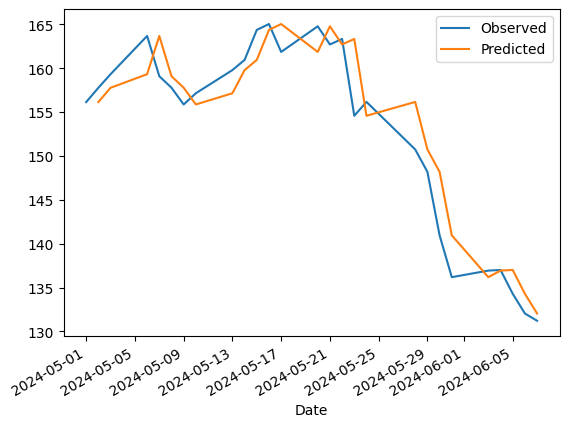

In [12]:
import yfinance as yf

# Fetch the data for SNOW
Snow_ticker = yf.Ticker('SNOW')
Snow_frame = Snow_ticker.history(start="2024-05-01", end="2024-06-14")

# Prepare the DataFrame for naive forecasting
snow_naive = Snow_frame['Close'].rename('Observed').to_frame()
snow_naive['Predicted'] = snow_naive['Observed'].shift()

# Display the first few rows and plot the data
print(snow_naive.head())
snow_naive.plot()


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

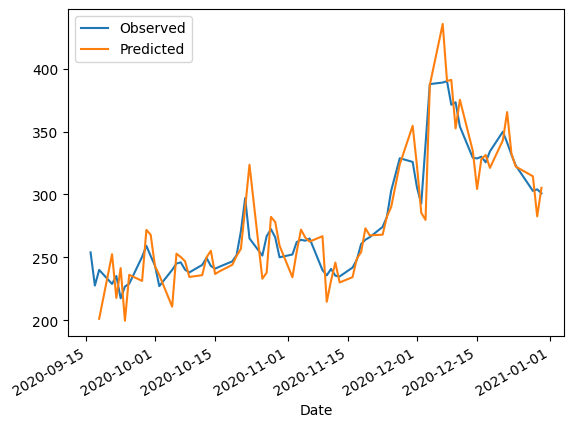

In [14]:
import yfinance as yf
import pandas as pd

# Fetching some example data
data = yf.download('SNOW', start='2020-01-01', end='2024-06-31')
Snow_frame = pd.DataFrame(data['Close'])  # Let's assume we're interested in the Close price
Snow_frame.rename(columns={'Close': 'Observed'}, inplace=True)  # Rename to 'Observed'

# Define the function
def difference_naive(df):
    differences = df['Observed'] - df['Observed'].shift()
    predictions_of_differences = differences.shift()
    df['Predicted'] = predictions_of_differences + df['Observed'].shift(1)

# Apply the function
difference_naive(Snow_frame)

# Plot the results
Snow_frame.plot()


[*********************100%%**********************]  1 of 1 completed


Historical Price Standard Deviation: 3.4687003834312495
Forecast Error Standard Deviation: 0.8060435108936272


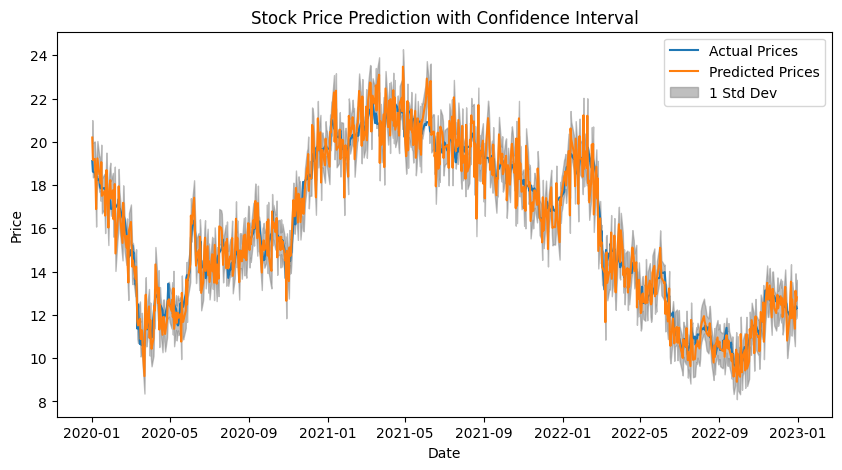

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical stock data
ticker = 'BASFY'  # Example stock ticker
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
historical_prices = data['Close']

# Calculate the standard deviation of historical prices
std_dev = np.std(historical_prices)
print("Historical Price Standard Deviation:", std_dev)

# Let's create some dummy predicted prices for illustration (you would replace this with your actual predictions)
predicted_prices = historical_prices * np.random.normal(1, 0.05, size=len(historical_prices))  # adding random noise for illustration

# Calculate the standard deviation of forecast errors
errors = historical_prices - predicted_prices
error_std_dev = np.std(errors)
print("Forecast Error Standard Deviation:", error_std_dev)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(historical_prices.index, historical_prices, label='Actual Prices')
plt.plot(historical_prices.index, predicted_prices, label='Predicted Prices')
plt.fill_between(historical_prices.index,
                 predicted_prices - error_std_dev,
                 predicted_prices + error_std_dev,
                 color='gray', alpha=0.5, label='1 Std Dev')
plt.title('Stock Price Prediction with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



[*********************100%%**********************]  1 of 1 completed


Predicted Prices BASF:
            Predicted
2024-06-11      12.41
2024-06-12      12.25
2024-06-13      12.09
2024-06-14      11.93


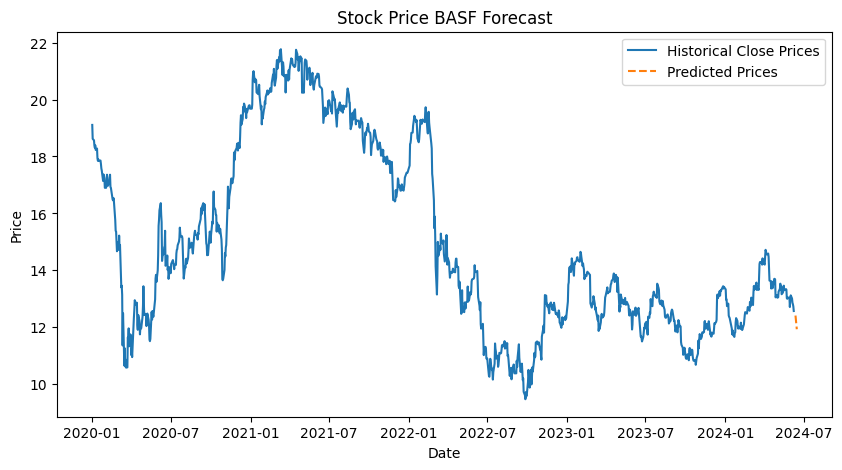

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock data
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return pd.DataFrame(data['Close'])

# Naive prediction function
def difference_naive_forecast(df, start_forecast, end_forecast):
    # Calculate differences
    differences = df['Close'] - df['Close'].shift(1)
    # Predict using the last known difference
    last_difference = differences.iloc[-1]

    # Generate forecast dates
    forecast_dates = pd.date_range(start=start_forecast, end=end_forecast, freq='B')
    predictions = [df['Close'].iloc[-1] + (i + 1) * last_difference for i in range(len(forecast_dates))]

    # Return predictions as a DataFrame for ease of plotting
    forecast_df = pd.DataFrame(predictions, index=forecast_dates, columns=['Predicted'])
    return forecast_df

# Example usage
ticker = 'BASFY'  # Example stock ticker
start_date = '2020-01-01'
end_date = '2024-06-10'  # Adjusted to the day before forecasting starts
stock_data = fetch_data(ticker, start_date, end_date)

# Forecasting from June 11, 2024, to June 15, 2024
predicted_prices = difference_naive_forecast(stock_data, '2024-06-11', '2024-06-14')

# Print the predicted prices with dates
print("Predicted Prices BASF:")
print(predicted_prices)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Historical Close Prices')
plt.plot(predicted_prices['Predicted'], label='Predicted Prices', linestyle='--')
plt.title('Stock Price BASF Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



[*********************100%%**********************]  1 of 1 completed


Predicted Prices for Apple Inc. (AAPL):
             Predicted
2024-06-10  199.300003
2024-06-11  201.710007
2024-06-12  204.120010
2024-06-13  206.530014
2024-06-14  208.940018


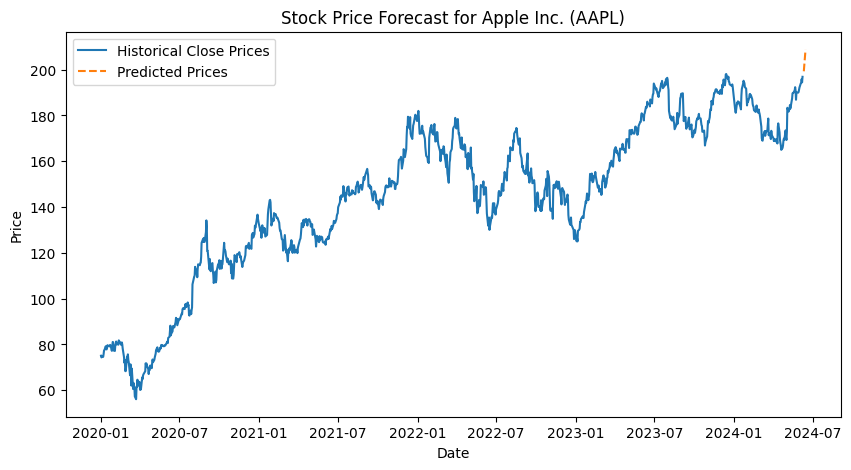

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock data
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return pd.DataFrame(data['Close'])

# Naive prediction function
def difference_naive_forecast(df, start_forecast, end_forecast):
    # Calculate differences
    differences = df['Close'] - df['Close'].shift(1)
    # Predict using the last known difference
    last_difference = differences.iloc[-1]

    # Generate forecast dates
    forecast_dates = pd.date_range(start=start_forecast, end=end_forecast, freq='B')
    predictions = [df['Close'].iloc[-1] + (i + 1) * last_difference for i in range(len(forecast_dates))]

    # Return predictions as a DataFrame for ease of plotting
    forecast_df = pd.DataFrame(predictions, index=forecast_dates, columns=['Predicted'])
    return forecast_df

# Example usage
ticker = 'AAPL'  # NASDAQ stock ticker for Apple Inc.
start_date = '2020-01-01'
end_date = '2024-06-10'  # Adjusted to the day before forecasting starts
stock_data = fetch_data(ticker, start_date, end_date)

# Forecasting from June 11, 2024, to June 15, 2024
predicted_prices = difference_naive_forecast(stock_data, '2024-06-08', '2024-06-14')

# Print the predicted prices with dates
print("Predicted Prices for Apple Inc. (AAPL):")
print(predicted_prices)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Historical Close Prices')
plt.plot(predicted_prices['Predicted'], label='Predicted Prices', linestyle='--')
plt.title('Stock Price Forecast for Apple Inc. (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


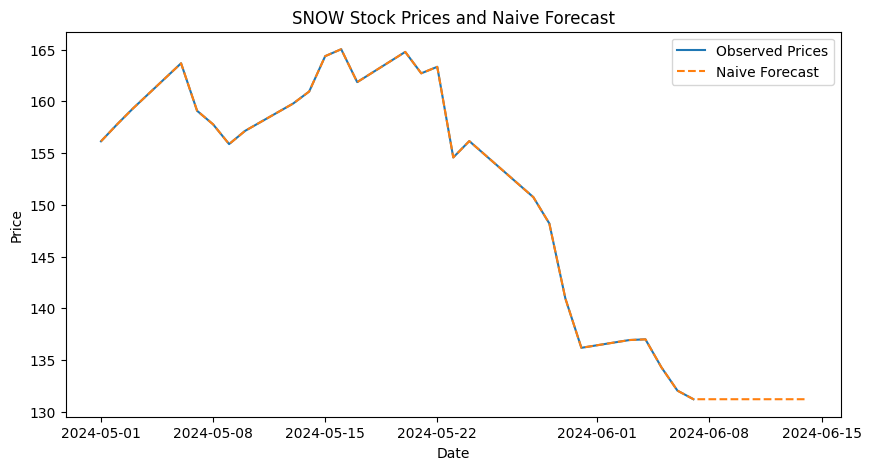

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the data for SNOW
Snow_ticker = yf.Ticker('SNOW')
Snow_frame = Snow_ticker.history(start="2024-05-01", end="2024-06-14")

# Prepare the DataFrame for naive forecasting
snow_naive = Snow_frame['Close'].rename('Observed').to_frame()

# Assuming the last known price should be used for future predictions
last_known_price = snow_naive['Observed'].iloc[-1]

# Generate future dates for prediction (let's say for 5 business days into the future)
future_dates = pd.date_range(start=snow_naive.index.max() + pd.Timedelta(days=1), periods=5, freq='B')

# Create a series with future predictions using the last known price
future_predictions = pd.Series([last_known_price] * len(future_dates), index=future_dates)

# Create a DataFrame from the future predictions
future_predictions_df = pd.DataFrame(future_predictions, columns=['Predicted'])

# Combine historical and future prediction data
snow_naive_combined = pd.concat([snow_naive, future_predictions_df])

# Fill missing 'Predicted' values in the historical data with the observed data for continuity
snow_naive_combined['Predicted'].fillna(snow_naive_combined['Observed'], inplace=True)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(snow_naive_combined['Observed'], label='Observed Prices')
plt.plot(snow_naive_combined['Predicted'], label='Naive Forecast', linestyle='--')
plt.title('SNOW Stock Prices and Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



Timezone of the data: Europe/Berlin


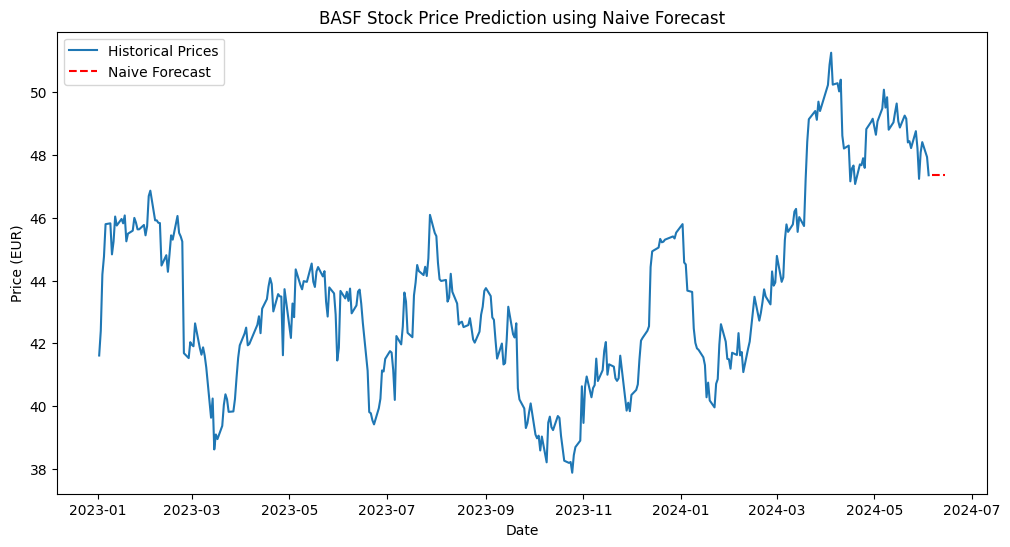

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch the data for BASF using the ticker "BAS.DE"
BASF_ticker = yf.Ticker('BAS.DE')
BASF_frame = BASF_ticker.history(start="2023-01-01", end="2024-06-05")  # Update to the most recent date possible

# Ensure timezone information is consistent
print("Timezone of the data:", BASF_frame.index.tz)  # This will show the timezone or None if not set

# Prepare the DataFrame for naive forecasting
basf_naive = BASF_frame['Close'].rename('Observed').to_frame()
last_observed_price = basf_naive['Observed'].iloc[-1]

# Generate predictions from today until 2024-06-15
# Localize or ensure timezone consistency with historical data
tz_info = BASF_frame.index.tz  # Capture the timezone from the historical data
prediction_dates = pd.date_range(start="2024-06-06", end="2024-06-15", freq='B', tz=tz_info)
predictions = pd.Series(data=last_observed_price, index=prediction_dates, name='Predicted')

# Combine observed and predicted into one DataFrame
combined = pd.concat([basf_naive, predictions.to_frame()], axis=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Observed'], label='Historical Prices')
plt.plot(combined.index, combined['Predicted'], label='Naive Forecast', linestyle='--', color='red')
plt.title('BASF Stock Price Prediction using Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Price (EUR)')
plt.legend()
plt.show()



In [ ]:
pip install pandas matplotlib yfinance


[*********************100%%**********************]  1 of 1 completed


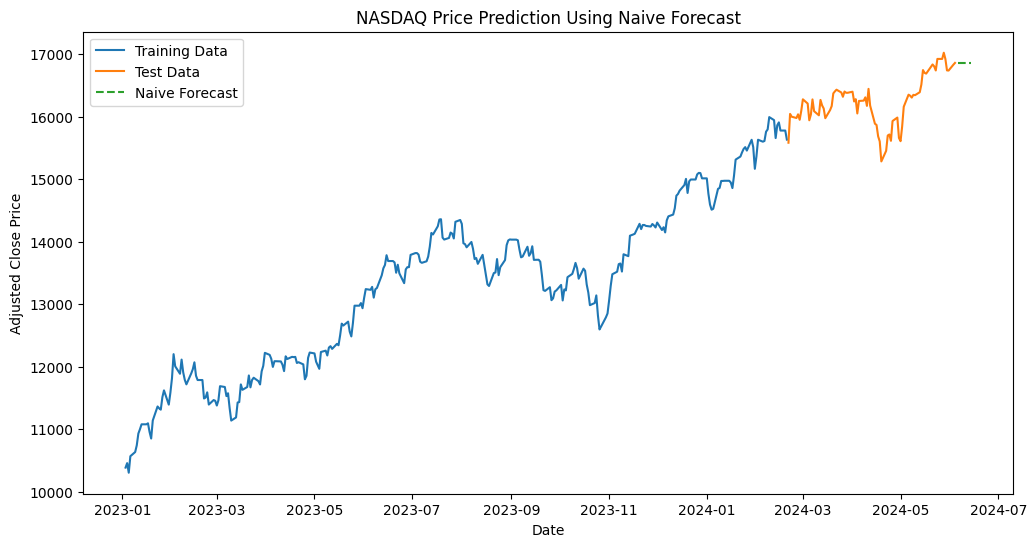

NASDAQ Predictions:
2024-06-06    16857.050781
2024-06-07    16857.050781
2024-06-10    16857.050781
2024-06-11    16857.050781
2024-06-12    16857.050781
2024-06-13    16857.050781
2024-06-14    16857.050781
Freq: B, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Function to download and process data for a given index
def process_index_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    data = data.asfreq('D')
    data = data.asfreq('B')
    data = data.ffill()
    return data['Adj Close']

# Function to split data into training and test sets
def split_data(data, train_ratio=0.8):
    train_size = int(len(data) * train_ratio)
    train_data = data[:train_size]
    test_data = data[train_size:]
    return train_data, test_data

# Function to perform naive forecasting
def make_predictions(data, start_date, end_date):
    last_known_price = data.iloc[-1]
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')
    predictions = pd.Series(data=last_known_price, index=date_range)
    return predictions

# Main execution block
if __name__ == "__main__":
    ticker = '^IXIC'  # NASDAQ Composite index ticker
    start_date = '2023-01-01'
    end_date = '2024-06-05'

    # Process data
    data = process_index_data(ticker, start_date, end_date)

    # Split data into training and testing datasets
    train_data, test_data = split_data(data)

    # Make predictions using naive forecast
    future_start_date = '2024-06-06'
    future_end_date = '2024-06-15'
    predictions = make_predictions(data, future_start_date, future_end_date)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Test Data')
    plt.plot(predictions, label='Naive Forecast', linestyle='--')
    plt.title('NASDAQ Price Prediction Using Naive Forecast')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

    # Output predictions
    print(f"NASDAQ Predictions:")
    print(predictions)




[*********************100%%**********************]  1 of 1 completed


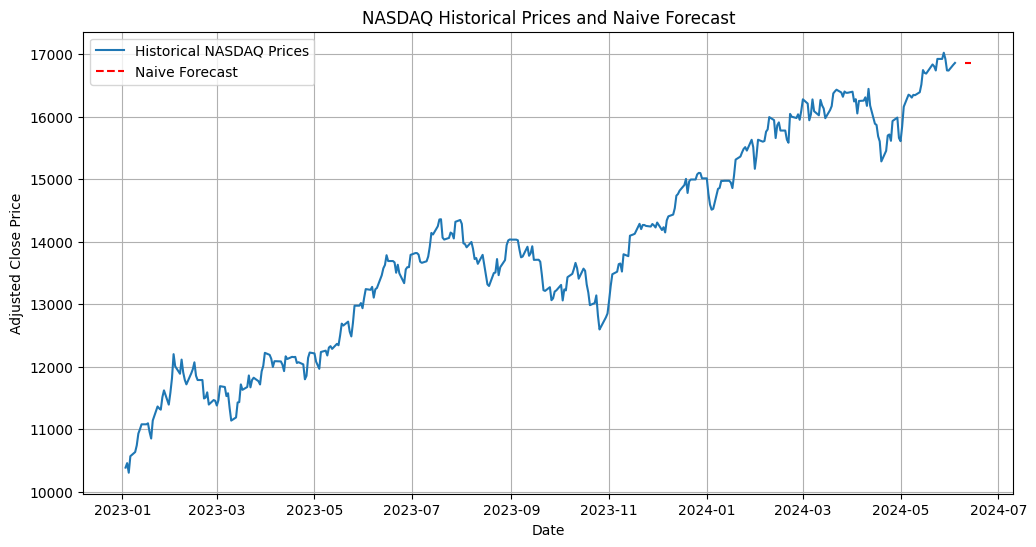

NASDAQ Naive Predictions for June 10, 2024, to June 15, 2024:
2024-06-10    16857.050781
2024-06-11    16857.050781
2024-06-12    16857.050781
2024-06-13    16857.050781
2024-06-14    16857.050781
Freq: B, dtype: float64


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to download and process NASDAQ data
def process_index_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    data = data.asfreq('B', method='ffill')  # Ensure it's business day frequency and fill missing values
    return data['Adj Close']

# Function to perform naive forecasting
def make_naive_forecast(last_known_price, start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')
    predictions = pd.Series(data=last_known_price, index=date_range)
    return predictions

# Main execution block
if __name__ == "__main__":
    ticker = '^IXIC'  # NASDAQ Composite index ticker
    start_date = '2023-01-01'
    end_date = '2024-06-05'  # Last date for historical data

    # Process the historical data
    data = process_index_data(ticker, start_date, end_date)

    # Get the last known price
    last_known_price = data.iloc[-1]

    # Dates for the naive forecast
    forecast_start_date = '2024-06-10'
    forecast_end_date = '2024-06-15'

    # Generate naive forecasts
    predictions = make_naive_forecast(last_known_price, forecast_start_date, forecast_end_date)

    # Plotting the historical data and the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Historical NASDAQ Prices')
    plt.plot(predictions, label='Naive Forecast', linestyle='--', color='red')
    plt.title('NASDAQ Historical Prices and Naive Forecast')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print out the predictions
    print("NASDAQ Naive Predictions for June 10, 2024, to June 15, 2024:")
    print(predictions)



# Seasonal Naive

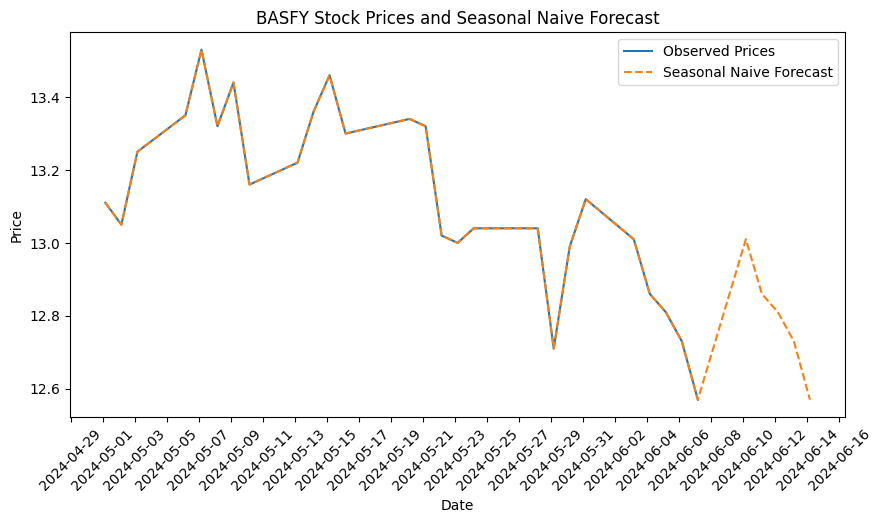

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fetch the data for BASF
BASF_ticker = yf.Ticker('BASFY')
BASF_frame = BASF_ticker.history(start="2024-05-01", end="2024-06-14")

# Prepare the DataFrame for naive forecasting
basf_naive = BASF_frame['Close'].rename('Observed').to_frame()

# Define the seasonal period (e.g., 5 business days in a week)
seasonal_period = 5

# Generate future dates for prediction (let's say for 5 business days into the future)
future_dates = pd.date_range(start=basf_naive.index.max() + pd.Timedelta(days=1), periods=5, freq='B')

# Get the last week's data to use for future prediction
last_week_prices = basf_naive['Observed'].iloc[-seasonal_period:]

# Map future dates to the corresponding weekday from the last observed week
future_predictions = pd.Series(index=future_dates)
for i, date in enumerate(future_dates):
    # Assign the price from the same weekday of the last known week
    future_predictions[date] = last_week_prices.iloc[i % seasonal_period]

# Create a DataFrame from the future predictions
future_predictions_df = pd.DataFrame(future_predictions, columns=['Predicted'])

# Combine historical and future prediction data
basf_naive_combined = pd.concat([basf_naive, future_predictions_df])

# Fill missing 'Predicted' values in the historical data with the observed data for continuity
basf_naive_combined['Predicted'].fillna(basf_naive_combined['Observed'], inplace=True)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(basf_naive_combined['Observed'], label='Observed Prices')
plt.plot(basf_naive_combined['Predicted'], label='Seasonal Naive Forecast', linestyle='--')

# Set x-axis to show a date every two days
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Rotate dates for better visibility

plt.title('BASFY Stock Prices and Seasonal Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()




The code above provided earlier does implement a form of lagged naive forecasting, specifically a seasonal naive approach. Here’s a quick recap and clarification of how the lagged component is factored in:

Seasonal Naive Forecasting:
The seasonal naive forecasting technique assumes that the pattern observed in the previous season will repeat itself in the current season. In this case, the seasonality was defined based on a weekly cycle, meaning that the value from the same weekday of the previous week was used as the prediction for the current week. This essentially uses a "lag" of one week.

Code Breakdown for Lagged Implementation:
In the seasonal naive approach, the code:

Takes the last week's prices and maps them to the corresponding weekdays in the future prediction period.
This mapping uses the last known values from the same days of the week (lagged by one week) to predict future values.



# Get the last week's data to use for future prediction
last_week_prices = basf_naive['Observed'].iloc[-seasonal_period:]

# Map future dates to the corresponding weekday from the last observed week
future_predictions = pd.Series(index=future_dates)
for i, date in enumerate(future_dates):
    # Assign the price from the same weekday of the last known week
    future_predictions[date] = last_week_prices.iloc[i % seasonal_period]



last_week_prices: Contains the closing prices of the last observed week.
Future predictions: Are generated by indexing last_week_prices with the modulo of the index from future_dates, which effectively repeats the weekday sequence.
Simple Lagged Naive Forecasting:
If you want a simpler lagged naive approach (not seasonally adjusted), where you just predict future values based on the immediately previous value, it's even more straightforward. You simply take the last observed value and project it forward as the forecast for all future periods. This would look like:



# Assuming the last known price should be used for future predictions
last_known_price = basf_naive['Observed'].iloc[-1]

# Create a series with future predictions using the last known price
future_predictions = pd.Series([last_known_price] * len(future_dates), index=future_dates)






The seasonal approach used in the previous responses is a variation of this, where the "last known price" is taken from the corresponding day of the week rather than just the very last value.

If you want a different type of lag, such as a lag of several days that isn't tied to the day of the week, that would require a slight adjustment to select different lagged values. If you need such an adjustment or further clarification, feel free to ask!

# Moving Average

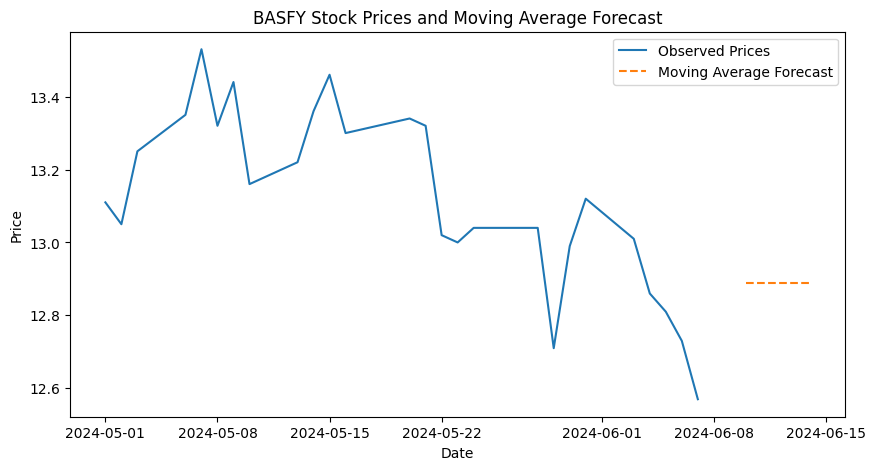

In [ ]:
# Calculate the moving average for the last 10 days of the observed data
moving_average = basf_naive['Observed'].rolling(window=10).mean().iloc[-1]

# Create a series with future predictions using the moving average
future_predictions_ma = pd.Series([moving_average] * len(future_dates), index=future_dates)

# Create a DataFrame from the future predictions
future_predictions_ma_df = pd.DataFrame(future_predictions_ma, columns=['Predicted'])

# Combine historical and future prediction data using moving average
basf_naive_combined_ma = pd.concat([basf_naive, future_predictions_ma_df])

# Plot the data with moving average
plt.figure(figsize=(10, 5))
plt.plot(basf_naive_combined_ma['Observed'], label='Observed Prices')
plt.plot(basf_naive_combined_ma['Predicted'], label='Moving Average Forecast', linestyle='--')
plt.title('BASFY Stock Prices and Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Example of Using cumsum for Cumulative Total of Stock Prices Moving Average

Integrating cumsum into a moving average calculation doesn't typically align with standard practices, as these two calculations serve different purposes in data analysis:

Cumulative Sum (cumsum): Adds up values cumulatively along a series, providing a running total.
Moving Average: Calculates the average of the data points over a specific window to smooth out short-term fluctuations and highlight longer-term trends.
However, if your goal is to explore a hybrid approach that combines elements of cumulative summing with moving averages, we might consider an interesting application—using cumulative sum to create a new series and then applying a moving average to this cumulative data. This can give insights into the smoothed trend of cumulative changes.

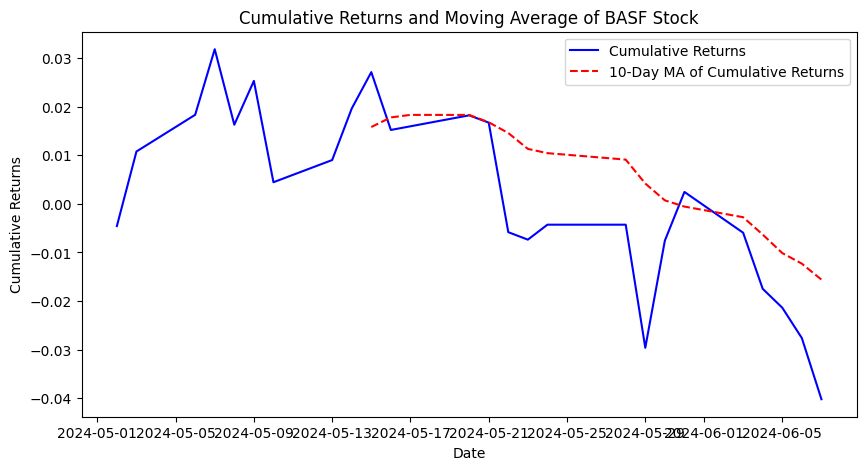

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the data for BASF
BASF_ticker = yf.Ticker('BASFY')
BASF_frame = BASF_ticker.history(start="2024-05-01", end="2024-06-14")

# Calculate daily returns
daily_returns = BASF_frame['Close'].pct_change()

# Calculate cumulative sum of daily returns
cumulative_returns = daily_returns.cumsum()

# Calculate a moving average of the cumulative returns
cumulative_returns_ma = cumulative_returns.rolling(window=10).mean()

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Cumulative Returns', color='blue')
plt.plot(cumulative_returns_ma, label='10-Day MA of Cumulative Returns', color='red', linestyle='--')
plt.title('Cumulative Returns and Moving Average of BASF Stock')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()



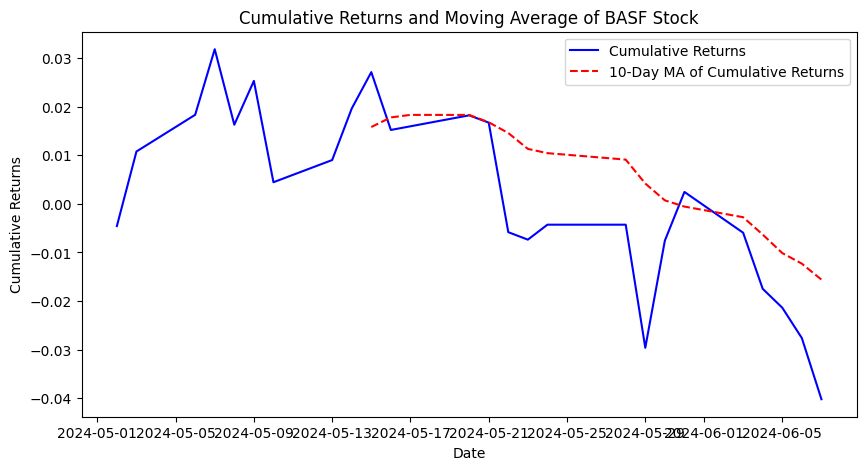

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the data for BASF
BASF_ticker = yf.Ticker('BASFY')
BASF_frame = BASF_ticker.history(start="2024-05-01", end="2024-06-14")

# Calculate daily returns using shift
daily_returns = (BASF_frame['Close'] - BASF_frame['Close'].shift(1)) / BASF_frame['Close'].shift(1)

# Calculate cumulative sum of daily returns
cumulative_returns = daily_returns.cumsum()

# Calculate a moving average of the cumulative returns
cumulative_returns_ma = cumulative_returns.rolling(window=10).mean()

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Cumulative Returns', color='blue')
plt.plot(cumulative_returns_ma, label='10-Day MA of Cumulative Returns', color='red', linestyle='--')
plt.title('Cumulative Returns and Moving Average of BASF Stock')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


 Above, it's important to understand what shift() does and when it might be used in time series analysis.

What is shift()?
The shift() function in pandas is used to shift the index of a DataFrame or Series by a specified number of periods. This is particularly useful in time series analysis for creating lagged features, which are needed for calculating changes over time, or for aligning data from different time periods for comparison.

When to Use shift()
shift() is typically used when you need to compare or compute based on previous values (lags) or future values (leads) in the data. For instance, when calculating daily returns manually, you might use shift() to align previous day's prices with current day's prices directly:

python
Copy code
# Calculate daily returns manually
daily_returns_manual = (BASF_frame['Close'] - BASF_frame['Close'].shift(1)) / BASF_frame['Close'].shift(1)
This calculation would effectively produce the same result as using the pct_change() function but gives you more control over the calculation process.

Integrating shift() in the Previous Example
If we consider integrating shift() into the previous cumulative sum with moving average example, it could be used to demonstrate how you can align shifted data for comparison or further calculations. However, in the context of calculating cumulative returns and their moving average, shift() wasn't necessary.

Here is a slight modification to include shift() just to demonstrate its use, though it may not add value to the specific calculation of cumulative returns and moving average:

# Difference Average

The "difference average" method for forecasting, which you might be referring to, typically involves calculating the differences between successive observations and then using the average of these differences to forecast future values. This method is particularly useful when the data exhibits a trend.

Here's how you can apply a "difference average" method to the BASF stock data to forecast future values:

Step-by-Step Approach:
Calculate the Differences: First, we compute the first differences of the series. This is done to remove any trend in the series, making it more stationary.
Compute the Average Difference: Calculate the average of these differences.
Apply the Average Difference for Forecasting: Use this average difference to incrementally forecast future values starting from the last known value.
Here is the Python code to implement this approach:

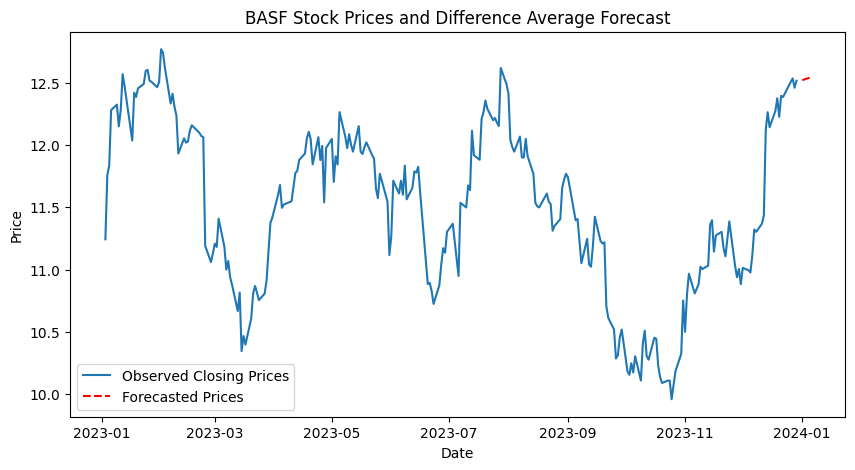

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the data for BASF
BASF_ticker = yf.Ticker('BASFY')
BASF_frame = BASF_ticker.history(start="2023-01-01", end="2023-12-31")

# Calculate the first differences of the closing prices
differences = BASF_frame['Close'].diff()

# Calculate the average of these differences
average_difference = differences.mean()

# Generate future dates for prediction (let's say for 5 business days into the future)
future_dates = pd.date_range(start=BASF_frame.index.max() + pd.Timedelta(days=1), periods=5, freq='B')

# Start forecasting from the last known closing price
last_known_price = BASF_frame['Close'].iloc[-1]
future_prices = [last_known_price + i * average_difference for i in range(1, len(future_dates) + 1)]

# Create a DataFrame from the future predictions
future_predictions_df = pd.DataFrame(future_prices, index=future_dates, columns=['Predicted'])

# Combine historical and future prediction data
BASF_combined = pd.concat([BASF_frame['Close'], future_predictions_df['Predicted']])

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(BASF_frame['Close'], label='Observed Closing Prices')
plt.plot(future_predictions_df, label='Forecasted Prices', linestyle='--', color='red')
plt.title('BASF Stock Prices and Difference Average Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import BDay

# Function to download and process data for a given index
def process_index_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data['Adj Close'].asfreq('B').ffill()  # Directly convert to business days and forward fill
    return data

# Function to split data into training and test sets
def split_data(data, train_ratio=0.8):
    train_size = int(len(data) * train_ratio)
    train_data = data[:train_size]
    test_data = data[train_size:]
    return train_data, test_data

# Function to fit ARIMA model and make predictions with specified order
def make_predictions(data, order, prediction_start, prediction_end):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    prediction_start = pd.to_datetime(prediction_start)
    prediction_end = pd.to_datetime(prediction_end)
    if not (prediction_start.isoweekday() <= 5 and prediction_end.isoweekday() <= 5):
        raise ValueError("Prediction start and end dates must be business days.")
    predictions = model_fit.predict(start=prediction_start, end=prediction_end)
    return predictions

# Dates
start_date = '2018-01-01'
end_date = '2023-11-30'
prediction_start_date = '2023-11-30'
prediction_end_date = '2023-12-07'

# Tickers for the indices and their corresponding ARIMA orders
indices = {
    'Nikkei 225': ('^N225', (2, 1, 2)),
    'S&P/ASX 200': ('^AXJO', (2, 1, 2)),
    'Hang Seng': ('^HSI', (0, 1, 0)),
    'EURO STOXX 50': ('^STOXX50E', (0, 1, 0)),
    'S&P 500': ('^GSPC', (2, 1, 2)),
    'NASDAQ': ('^IXIC', (1, 1, 0)),
    'Dow Jones Industrial Average': ('^DJI', (1, 1, 0))
}

# Process data and make predictions for each index with the specified ARIMA order
for index_name, (ticker, order) in indices.items():
    try:
        print(f"Processing {index_name}...")
        index_data = process_index_data(ticker, start_date, end_date)
        index_predictions = make_predictions(index_data, order, prediction_start_date, prediction_end_date)
        print(f"{index_name} Predictions:")
        print(index_predictions)
        print()
    except Exception as e:
        print(f"An error occurred while processing {index_name}: {e}")




Processing Nikkei 225...
[*********************100%%**********************]  1 of 1 completed
Nikkei 225 Predictions:
2023-11-30    33322.273856
2023-12-01    33303.287157
2023-12-04    33322.196119
2023-12-05    33320.337949
2023-12-06    33304.392026
2023-12-07    33322.869686
Freq: B, Name: predicted_mean, dtype: float64

Processing S&P/ASX 200...
[*********************100%%**********************]  1 of 1 completed
S&P/ASX 200 Predictions:
2023-11-30    7033.094524
2023-12-01    7036.765978
2023-12-04    7034.613776
2023-12-05    7033.741746
2023-12-06    7036.653221
2023-12-07    7034.160084
Freq: B, Name: predicted_mean, dtype: float64

Processing Hang Seng...
[*********************100%%**********************]  1 of 1 completed
Hang Seng Predictions:
2023-11-30    16993.439453
2023-12-01    16993.439453
2023-12-04    16993.439453
2023-12-05    16993.439453
2023-12-06    16993.439453
2023-12-07    16993.439453
Freq: B, Name: predicted_mean, dtype: float64

Processing EURO STOXX 50.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


S&P 500 Predictions:
2023-11-30    4548.834647
2023-12-01    4549.887045
2023-12-04    4549.567315
2023-12-05    4549.213151
2023-12-06    4550.104835
2023-12-07    4548.861764
Freq: B, Name: predicted_mean, dtype: float64

Processing NASDAQ...
[*********************100%%**********************]  1 of 1 completed
NASDAQ Predictions:
2023-11-30    14260.433743
2023-12-01    14260.271418
2023-12-04    14260.284976
2023-12-05    14260.283843
2023-12-06    14260.283938
2023-12-07    14260.283930
Freq: B, Name: predicted_mean, dtype: float64

Processing Dow Jones Industrial Average...
[*********************100%%**********************]  1 of 1 completed
Dow Jones Industrial Average Predictions:
2023-11-30    35429.006760
2023-12-01    35429.155744
2023-12-04    35429.140059
2023-12-05    35429.141710
2023-12-06    35429.141536
2023-12-07    35429.141555
Freq: B, Name: predicted_mean, dtype: float64



In [ ]:
import yfinance as yf
import pandas as pd

# Define the tickers for the indices
# Note: The ticker symbols might vary based on the data provider.
# Here, we're using Yahoo Finance's symbols.
tickers = {
    'EURO_STOXX_50': '^STOXX50E',  # EURO STOXX 50
    'US500': '^GSPC'  # S&P 500
}

# Fetch data
start_date = '2020-01-01'  # You can modify this as per your requirements
end_date = '2023-09-25'
data = yf.download(list(tickers.values()), start=start_date, end=end_date)['Adj Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Compute correlation
correlations = returns.corr()

# Extract the correlation with US500
us500_correlations = correlations['^GSPC']

print(us500_correlations)


[*********************100%%**********************]  2 of 2 completed
^GSPC        1.000000
^STOXX50E    0.613874
Name: ^GSPC, dtype: float64


In [ ]:
# European indexes with US500

import yfinance as yf
import pandas as pd

# Define the tickers for the indices
# Note: The ticker symbols might vary based on the data provider.
# Here, we're using Yahoo Finance's symbols.
tickers = {
    'Germany': '^GDAXI',     # DAX 30
    'UK': '^FTSE',          # FTSE 100
    'France': '^FCHI',      # CAC 40
    'Netherlands': '^AEX',  # AEX
    'US500': '^GSPC'        # S&P 500
}

# Fetch data
start_date = '2020-01-01'  # You can modify this as per your requirements
end_date = '2021-09-25'
data = yf.download(list(tickers.values()), start=start_date, end=end_date)['Adj Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Compute correlation
correlations = returns.corr()

# Extract the correlation with US500
us500_correlations = correlations['^GSPC']

print(us500_correlations)


[*********************100%%**********************]  5 of 5 completed
^AEX      0.624644
^FCHI     0.649237
^FTSE     0.654633
^GDAXI    0.651906
^GSPC     1.000000
Name: ^GSPC, dtype: float64


In [ ]:
import yfinance as yf
import pandas as pd

# Define the tickers for the Asian, European, and Australian indices
tickers = [
    '^N225',      # Nikkei 225 (Japan)
    '^HSI',       # Hang Seng (Hong Kong)
    '000001.SS',  # Shanghai Composite (China)
    '^BSESN',     # BSE Sensex (India)
    '^AXJO',      # ASX 200 (Australia)
    '^GDAXI',     # DAX 30 (Germany)
    '^FTSE',      # FTSE 100 (UK)
    '^FCHI',      # CAC 40 (France)
    '^AEX'        # AEX (Netherlands)
]

# Fetch data
start_date = '2020-01-01'  # Modify as per your requirements
end_date = '2023-09-25'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Compute correlation
correlations = returns.corr()

# Since the matrix can be large, you might want to save it to a CSV for easier inspection
correlations.to_csv('correlation_matrix.csv')

print(correlations)


[*********************100%%**********************]  9 of 9 completed
           000001.SS      ^AEX     ^AXJO    ^BSESN     ^FCHI     ^FTSE  \
000001.SS   1.000000  0.250648  0.293786  0.291236  0.202566  0.225336   
^AEX        0.250648  1.000000  0.424606  0.485218  0.902804  0.848972   
^AXJO       0.293786  0.424606  1.000000  0.441502  0.447867  0.478270   
^BSESN      0.291236  0.485218  0.441502  1.000000  0.521603  0.500116   
^FCHI       0.202566  0.902804  0.447867  0.521603  1.000000  0.877899   
^FTSE       0.225336  0.848972  0.478270  0.500116  0.877899  1.000000   
^GDAXI      0.191755  0.901368  0.422128  0.487423  0.944434  0.847575   
^HSI        0.608010  0.395539  0.400404  0.406494  0.346738  0.350704   
^N225       0.317107  0.371543  0.498939  0.368332  0.357124  0.361733   

             ^GDAXI      ^HSI     ^N225  
000001.SS  0.191755  0.608010  0.317107  
^AEX       0.901368  0.395539  0.371543  
^AXJO      0.422128  0.400404  0.498939  
^BSESN     0.487423  0

^FCHI (CAC 40, France) and ^GDAXI (DAX 30, Germany): 0.944434

^FCHI (CAC 40, France) and ^AEX (AEX, Netherlands): 0.902804

^GDAXI (DAX 30, Germany) and ^AEX (AEX, Netherlands): 0.901368

^FCHI (CAC 40, France) and ^FTSE (FTSE 100, UK): 0.877899

^FTSE (FTSE 100, UK) and ^AEX (AEX, Netherlands): 0.848972

^GDAXI (DAX 30, Germany) and ^FTSE (FTSE 100, UK): 0.847575

^BSESN (BSE Sensex, India) and ^FCHI (CAC 40, France): 0.521603

^BSESN (BSE Sensex, India) and ^AEX (AEX, Netherlands): 0.485218

^AXJO (ASX 200, Australia) and ^FTSE (FTSE 100, UK): 0.478270

^BSESN (BSE Sensex, India) and ^GDAXI (DAX 30, Germany): 0.487423

...

It's still evident that the European indices are highly correlated with each other. Interestingly, the Shanghai Composite (000001.SS) has a strong correlation with the Hang Seng Index (^HSI) of Hong Kong, at 0.608010, which is the strongest correlation involving an Asian index in the list.

This analysis provides insights into



# NASDAQ ARIMA

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Download NASDAQ data
nasdaq = yf.download('^IXIC', start='2018-01-01', end='2023-11-21')

# Delete columns 'Open', 'High', 'Low', and 'Close'
nasdaq = nasdaq.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to daily frequency
nasdaq = nasdaq.asfreq('D')

# Resample the data to business daily frequency
nasdaq = nasdaq.asfreq('B')

# Forward fill missing values
nasdaq = nasdaq.ffill()

# Extract the 'Adj Close' column for modeling
data = nasdaq['Adj Close']

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model using all available data
model = ARIMA(data, order=(1, 1, 0))
model_fit = model.fit()

# Generate predictions for the specified dates
start_date = '2023-11-20'
end_date = '2023-11-25'

# Generate predictions for the specified dates
predictions = model_fit.predict(start=start_date, end=end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
2023-11-20    14124.499089
2023-11-21    14271.314274
2023-11-22    14272.412437
2023-11-23    14272.321187
2023-11-24    14272.328769
2023-11-27    14272.328139
Freq: B, Name: predicted_mean, dtype: float64


### MSE

In [ ]:
# Calculate MSE for the test set
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error on Test Set: {mse}")



Mean Squared Error on Test Set: 1665325.9743001992


# NASDAQ LSTM

In [ ]:
import os
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Suppress TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# Download NASDAQ Composite Index data
nasdaq = yf.download('^IXIC', start='2018-01-01', end='2023-11-01')

# Extract the 'Adj Close' column for modeling
nasdaq = nasdaq['Adj Close']

# Resample to business days and forward-fill any NaNs
nasdaq = nasdaq.asfreq('B').ffill()

# Normalize the data
data = nasdaq.values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create input sequences and labels for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 30
sequences, labels = create_sequences(data, seq_length)
split_index = int(len(sequences) * 0.8)
train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=64, verbose=0)

def predict_for_range(start_date, end_date):
    # Get business days between start_date and end_date
    business_days = pd.bdate_range(start_date, end_date)

    # Prepare initial data for prediction
    future_data = data[-seq_length:].reshape(1, seq_length, 1)
    future_predictions = []

    # Predict iteratively for each day in the range
    for _ in business_days:
        prediction = model.predict(future_data, verbose=0)
        future_predictions.append(prediction[0, 0])
        future_data = np.append(future_data[:, 1:], prediction.reshape(1, 1, 1), axis=1)

    # Inverse transform predictions to the original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Convert predictions to a pandas DataFrame with business_days as index
    predictions_df = pd.DataFrame(future_predictions, index=business_days, columns=['Predicted Value'])

    return predictions_df

# Generate predictions for the specified dates
start_date = '2023-10-30'
end_date = '2023-11-03'
predictions = predict_for_range(start_date, end_date)

# Print the predictions
print(predictions)



[*********************100%%**********************]  1 of 1 completed
            Predicted Value
2023-10-30     12665.390625
2023-10-31     12655.816406
2023-11-01     12648.087891
2023-11-02     12643.664062
2023-11-03     12641.417969


In [ ]:
# Reshape the predictions to match the shape of test_labels
test_predictions = test_predictions.reshape(test_predictions.shape[0], 1)

# Calculate MSE for the test set
mse = mean_squared_error(test_labels, test_predictions)
print(f"Mean Squared Error on Test Set: {mse}")




ValueError: ignored

# nasdaq100 ARIMA

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Download NASDAQ 100 data
nasdaq100 = yf.download('^NDX', start='2018-01-01', end='2023-11-10')

# Delete columns 'Open', 'High', 'Low', and 'Close'
nasdaq100 = nasdaq100.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to daily frequency
nasdaq100 = nasdaq100.asfreq('D')

# Resample the data to daily frequency (business days only)
nasdaq100 = nasdaq100.asfreq('B')

# Forward fill missing values
nasdaq100 = nasdaq100.ffill()

# Extract the 'Adj Close' column for modeling
data = nasdaq100['Adj Close']

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model using all available data
model = ARIMA(data, order=(1, 1, 0))
model_fit = model.fit()

# Generate predictions for the specified dates
start_date = '2023-11-09'
end_date = '2023-11-10'

# Generate predictions for the specified dates
predictions = model_fit.predict(start=start_date, end=end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
2023-11-09    15311.637674
2023-11-10    15199.564532
Freq: B, Name: predicted_mean, dtype: float64


In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Function to download and process data for a given index
def process_index_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    data = data['Adj Close'].asfreq('B').ffill()
    return data

# Function to split data into training and test sets
def split_data(data, train_ratio=0.8):
    train_size = int(len(data) * train_ratio)
    train_data = data[:train_size]
    test_data = data[train_size:]
    return train_data, test_data

# Function to fit ARIMA model and make predictions with specified order
def make_predictions(train_data, order, prediction_start, prediction_end):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=prediction_start, end=prediction_end)
    return predictions

# Dates
start_date = '2018-01-01'
end_date = '2023-11-10'
prediction_start_date = '2023-11-09'
prediction_end_date = '2023-11-10'

# Tickers for the indices and their corresponding ARIMA orders
indices = {
    '^IXIC': {'name': 'NASDAQ', 'order': (1, 1, 0)},
    '^GSPC': {'name': 'S&P 500', 'order': (2, 1, 2)}
}

# Process data and make predictions for each index with the specified ARIMA order
for ticker, info in indices.items():
    # Download and process the index data
    index_data = process_index_data(ticker, start_date, end_date)

    # Split the data into training and testing sets
    train_data, test_data = split_data(index_data)

    # Fit the ARIMA model and make predictions
    predictions = make_predictions(train_data, info['order'], prediction_start_date, prediction_end_date)

    # Print the predictions
    print(f"{info['name']} Predictions from {prediction_start_date} to {prediction_end_date}:")
    print(predictions)
    print()


[*********************100%%**********************]  1 of 1 completed
NASDAQ Predictions from 2023-11-09 to 2023-11-10:
2023-11-09    11767.681226
2023-11-10    11767.681226
Freq: B, Name: predicted_mean, dtype: float64

[*********************100%%**********************]  1 of 1 completed
S&P 500 Predictions from 2023-11-09 to 2023-11-10:
2023-11-09    3969.819613
2023-11-10    3969.819613
Freq: B, Name: predicted_mean, dtype: float64



# SPX500 ARIMA

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Download SPX500 data
spx500 = yf.download('^GSPC', start='2018-01-01', end='2023-11-10')

# Delete columns 'Open', 'High', 'Low', and 'Close'
spx500 = spx500.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to daily frequency
spx500 = spx500.asfreq('D')

# Resample the data to daily frequency
spx500 = spx500.asfreq('B')

# Forward fill missing values
spx500 = spx500.ffill()

# Extract the 'Adj Close' column for modeling
data = spx500['Adj Close']

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model using all available data
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Generate predictions for the specified dates
start_date = '2023-11-09'
end_date = '2023-11-10'

# Generate predictions for the specified dates
predictions = model_fit.predict(start=start_date, end=end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
2023-11-09    4380.448162
2023-11-10    4351.922148
Freq: B, Name: predicted_mean, dtype: float64


# SPX500 SARIMAX

In [ ]:
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Download SPX500 data
spx500 = yf.download('^GSPC', start='2018-01-01', end='2023-10-23')

# Delete unnecessary columns
spx500 = spx500.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to daily frequency
spx500 = spx500.asfreq('D')

# Resample the data to business day frequency (weekdays only)
spx500_business = spx500.resample('B').ffill()

# Extract the 'Adj Close' column for modeling
data = spx500_business['Adj Close']

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit SARIMA model using all available data
order = (2, 1, 2)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, S)
model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Generate predictions for the specified dates
start_date = '2023-10-20'
end_date = '2023-10-27'

# Generate predictions for the specified dates
predictions = model_fit.predict(start=start_date, end=end_date)

# Print the predictions
print(predictions)



[*********************100%%**********************]  1 of 1 completed
2023-10-20    4285.231482
2023-10-23    4225.655468
2023-10-24    4229.542798
2023-10-25    4239.683820
2023-10-26    4236.856022
2023-10-27    4238.804598
Freq: B, Name: predicted_mean, dtype: float64


# SPX500 ARIMA INPUT

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import BDay
from datetime import datetime, timedelta

# Input starting and ending date for historical data retrieval
start_date_hist = input("Enter the starting date for historical data (YYYY-MM-DD): ")
end_date_hist = input("Enter the ending date for historical data (YYYY-MM-DD): ")

spx500 = yf.download('^GSPC', start=start_date_hist, end=end_date_hist)

# Delete columns 'Open', 'High', 'Low', 'Close', and 'Volume'
spx500 = spx500.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to business day frequency
spx500 = spx500.asfreq('B')

# Forward fill missing values
spx500 = spx500.ffill()

# Extract the 'Adj Close' column for modeling
data = spx500['Adj Close']

# Split the data into training and testing sets (80% train, 20% test)
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model on training data
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# Predict on testing data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Print model performance on test data
print("\nModel Performance on Testing Data:")
mse = ((predictions - test_data) ** 2).mean()
print(f'Mean Squared Error: {mse}')

# Fit ARIMA model on entire dataset for forecasting
model_full = ARIMA(data, order=(2, 1, 2))
model_fit_full = model_full.fit()

# Input prediction start and end dates
start_date_pred = input("Enter the starting date for prediction (YYYY-MM-DD): ")
end_date_pred = input("Enter the ending date for prediction (YYYY-MM-DD): ")

# Calculate number of business days for prediction
days_to_forecast = np.busday_count(start_date_pred, end_date_pred) + 1

forecasted_prices = model_fit_full.predict(start=len(data), end=len(data) + days_to_forecast - 1, typ='levels')

# Set the date index for the forecasted prices to be business days
forecasted_dates = pd.date_range(start=start_date_pred, periods=days_to_forecast, freq=BDay())
forecasted_prices.index = forecasted_dates

print(f"\nForecasted Prices from {start_date_pred} to {end_date_pred}:")
print(forecasted_prices)





KeyboardInterrupt: ignored

# SPX LSTM

In [ ]:
import os
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Suppress TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# Download S&P 500 data
spx = yf.download('^GSPC', start='2018-01-01', end='2023-10-23')

# Extract the 'Adj Close' column for modeling
spx = spx['Adj Close']

# Resample to business days and forward-fill any NaNs
spx = spx.asfreq('B').ffill()

# Normalize the data
data = spx.values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create input sequences and labels for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 30
sequences, labels = create_sequences(data, seq_length)
split_index = int(len(sequences) * 0.8)
train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=64, verbose=0)

def predict_for_range(start_date, end_date):
    # Get business days between start_date and end_date
    business_days = pd.bdate_range(start_date, end_date)

    # Prepare initial data for prediction
    future_data = data[-seq_length:].reshape(1, seq_length, 1)
    future_predictions = []

    # Predict iteratively for each day in the range
    for _ in business_days:
        prediction = model.predict(future_data, verbose=0)
        future_predictions.append(prediction[0, 0])
        future_data = np.append(future_data[:, 1:], prediction.reshape(1, 1, 1), axis=1)

    # Inverse transform predictions to the original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Convert predictions to a pandas DataFrame with business_days as index
    predictions_df = pd.DataFrame(future_predictions, index=business_days, columns=['Predicted Value'])

    return predictions_df

# Generate predictions for the specified dates
start_date = '2023-10-20'
end_date = '2023-10-27'
predictions = predict_for_range(start_date, end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
            Predicted Value
2023-10-20      4358.333984
2023-10-23      4366.494141
2023-10-24      4377.912109
2023-10-25      4390.540039
2023-10-26      4403.575195
2023-10-27      4415.657715


Fit an ARIMA model to the returns of the series.
Use the residuals from the ARIMA model and fit a GARCH model to model the volatility.
Use the ARIMA model to forecast the mean of the returns.
Use the GARCH model to forecast the volatility of the returns.
Combine the forecasts from steps 3 and 4 to get the final forecasted returns.

# SPX ARIMA A

In [ ]:
pip install yfinance statsmodels arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 11.5 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import BDay
from arch import arch_model

# Input starting and ending date for historical data retrieval
start_date_hist = input("Enter the starting date for historical data (YYYY-MM-DD): ")
end_date_hist = input("Enter the ending date for historical data (YYYY-MM-DD): ")

spx500 = yf.download('^GSPC', start=start_date_hist, end=end_date_hist)
spx500 = spx500.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
spx500 = spx500.asfreq('B')
spx500 = spx500.ffill()

# Extract the 'Adj Close' column for modeling
data = spx500['Adj Close']
returns = data.pct_change().dropna()  # calculate returns for GARCH model

# Split the data into training and testing sets (80% train, 20% test)
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model on training data
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# GARCH model on residuals of ARIMA model
residuals = model_fit.resid
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_model_fit = garch_model.fit(disp='off')

# Predict on testing data using ARIMA
arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Predict volatility using GARCH and combine it with ARIMA predictions
volatility = np.sqrt(garch_model_fit.forecast(start=0, horizon=len(test_data)).variance.values[-1, :])
combined_predictions = arima_predictions + volatility

print("\nModel Performance on Testing Data:")
mse = ((combined_predictions - test_data) ** 2).mean()
print(f'Mean Squared Error: {mse}')

# Fit ARIMA model on entire dataset for forecasting
model_full = ARIMA(data, order=(2, 1, 2))
model_fit_full = model_full.fit()

# GARCH model on residuals of full ARIMA model
residuals_full = model_fit_full.resid
garch_model_full = arch_model(residuals_full, vol='Garch', p=1, q=1)
garch_model_fit_full = garch_model_full.fit(disp='off')

# Input prediction start and end dates
start_date_pred = input("Enter the starting date for prediction (YYYY-MM-DD): ")
end_date_pred = input("Enter the ending date for prediction (YYYY-MM-DD): ")

# Calculate number of business days for prediction
days_to_forecast = np.busday_count(start_date_pred, end_date_pred) + 1

# ARIMA forecast
forecasted_prices_arima = model_fit_full.predict(start=len(data), end=len(data) + days_to_forecast - 1, typ='levels')

# GARCH forecast for volatility
volatility_forecast = np.sqrt(garch_model_fit_full.forecast(start=0, horizon=days_to_forecast).variance.values[-1, :])
forecasted_prices_combined = forecasted_prices_arima + volatility_forecast

# Set the date index for the forecasted prices to be business days
forecasted_dates = pd.date_range(start=start_date_pred, periods=days_to_forecast, freq=BDay())
forecasted_prices_combined.index = forecasted_dates

print(f"\nForecasted Prices from {start_date_pred} to {end_date_pred}:")
print(forecasted_prices_combined)

Enter the starting date for historical data (YYYY-MM-DD): 2018-01-01
Enter the ending date for historical data (YYYY-MM-DD): 2023-10-20
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)



Model Performance on Testing Data:
Mean Squared Error: 70571.58825742696
Enter the starting date for prediction (YYYY-MM-DD): 2023-10-18
Enter the ending date for prediction (YYYY-MM-DD): 2023-10-20

Forecasted Prices from 2023-10-18 to 2023-10-20:
2023-10-18    4319.779000
2023-10-19    4320.457646
2023-10-20    4321.084671
Freq: B, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# EURO50 ARIMA

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Download Euro Stoxx 50 data
euro50 = yf.download('^STOXX50E', start='2018-01-01', end='2023-11-13')

# Delete columns 'Open', 'High', 'Low', and 'Close'
euro50 = euro50.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to daily frequency
euro50 = euro50.asfreq('D')

# Resample the data to daily business frequency
euro50 = euro50.asfreq('B')

# Forward fill missing values
euro50 = euro50.ffill()

# Extract the 'Adj Close' column for modeling
data = euro50['Adj Close']

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model using all available data
model = ARIMA(data, order=(0, 1, 0))
model_fit = model.fit()

# Generate predictions for the specified dates
start_date = '2023-11-10'
end_date = '2023-11-16'
predictions = model_fit.predict(start=start_date, end=end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
2023-11-10    4229.200195
2023-11-13    4197.359863
2023-11-14    4197.359863
2023-11-15    4197.359863
2023-11-16    4197.359863
Freq: B, Name: predicted_mean, dtype: float64


# EURO50 AUTO ARIMA

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
from pmdarima import auto_arima

# Download Euro Stoxx 50 data
euro50 = yf.download('^STOXX50E', start='2018-01-01', end='2023-10-20')

# Extract the 'Adj Close' values
data = euro50['Adj Close']

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Use auto_arima to determine best model parameters
model = auto_arima(train, seasonal=True, m=12, trace=True, error_action="ignore", suppress_warnings=True)

# Generate predictions for the specified dates
def predict(start_date, end_date):
    forecast_index = pd.date_range(start=start_date, end=end_date)
    n_periods = len(forecast_index)

    # Use predict method for out-of-sample predictions, specifying the starting point for the prediction
    forecast = model.predict(n_periods=n_periods, start=train_size)

    return pd.DataFrame(forecast, index=forecast_index, columns=['Predicted Value'])

# Provide model summary
print(model.summary())

start_date = '2023-10-18'
end_date = '2023-10-27'
predictions = predict(start_date, end_date)

# Print the predictions
print(predictions)



[*********************100%%**********************]  1 of 1 completed
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=12179.347, Time=13.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12170.542, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=12174.193, Time=0.89 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=12174.215, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12168.553, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=12172.542, Time=0.62 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=12172.542, Time=0.67 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=12174.529, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=12172.193, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=12172.215, Time=0.86 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=12173.637, Time=1.83 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 21.990 seconds
                               SARIMAX Results              

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# EURO50 LSTM

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download Euro Stoxx 50 (EURO STOXX 50) data without progress bar
euro50 = yf.download('^STOXX50E', start='2018-01-01', end='2023-11-03', progress=False)

# Extract the 'Adj Close' column for modeling
data = euro50['Adj Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create input sequences and labels for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length:i+seq_length+1])  # Fix labels shape
    return np.array(sequences), np.array(labels)

# Define the sequence length and split data into training and testing sets
seq_length = 30
sequences, labels = create_sequences(data, seq_length)
split_index = int(len(sequences) * 0.8)
train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=64, verbose=0)

# Generate predictions for the next 3 days
future_data = data[-seq_length:].reshape(1, seq_length, 1)
future_predictions = []

for _ in range(3):
    prediction = model.predict(future_data)
    future_predictions.append(prediction[0, 0])
    future_data = np.append(future_data[:, 1:], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate predictions for the specified dates
start_date = '2023-11-02'
end_date = '2023-11-03'
predictions = model_fit.predict(start=start_date, end=end_date)

# Print the predictions
print(predictions)


1/1 [==============================] - 0s 52ms/step
2023-11-02    4091.709961
2023-11-03    4169.620117
Freq: B, Name: predicted_mean, dtype: float64


### MSE

In [ ]:
mse_a = model.evaluate(test_sequences, test_labels, verbose=0)
print(f"Model A's MSE on Test Data: {mse_a}")


Model A's MSE on Test Data: 0.0007399191963486373


In [ ]:
import os
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Suppress TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Set log level to ERROR
tf.get_logger().setLevel('ERROR')        # Ensure the change is reflected in the logger

# Download Euro Stoxx 50 (EURO STOXX 50) data
euro50 = yf.download('^STOXX50E', start='2018-01-01', end='2023-10-18')

# Extract the 'Adj Close' column for modeling
data = euro50['Adj Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create input sequences and labels for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length:i+seq_length+1])  # Fix labels shape
    return np.array(sequences), np.array(labels)

# Define the sequence length and split data into training and testing sets
seq_length = 30
sequences, labels = create_sequences(data, seq_length)
split_index = int(len(sequences) * 0.8)
train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=64, verbose=0)

# Generate predictions for the next 3 days
future_data = data[-seq_length:].reshape(1, seq_length, 1)
future_predictions = []

for _ in range(3):
    prediction = model.predict(future_data, verbose=0)
    future_predictions.append(prediction[0, 0])
    future_data = np.append(future_data[:, 1:], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a pandas date range for the prediction dates
future_dates = pd.date_range(start='2023-10-18', periods=3, freq='D')

# Convert predictions to a pandas DataFrame with the future_dates as index
predictions_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Value'])

def predict(start_date, end_date):
    return predictions_df.loc[start_date:end_date]

# Generate predictions for the specified dates
start_date = '2023-10-18'
end_date = '2023-10-20'
predictions = predict(start_date, end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
            Predicted Value
2023-10-18      4160.695801
2023-10-19      4155.591309
2023-10-20      4149.116699


### MSE

In [ ]:
mse_b = model.evaluate(test_sequences, test_labels, verbose=0)
print(f"Model B's MSE on Test Data: {mse_b}")


Model B's MSE on Test Data: 0.0007848714012652636


### if elif else

In [ ]:
if mse_a < mse_b:
    print("Model A is more accurate with a lower MSE.")
elif mse_b < mse_a:
    print("Model B is more accurate with a lower MSE.")
else:
    print("Both models have the same MSE.")


Model A is more accurate with a lower MSE.


# HK ARIMA

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Download HK50 data
hk50 = yf.download('^HSI', start='2018-01-01', end='2023-11-06')

# Delete columns 'Open', 'High', 'Low', and 'Close'
hk50 = hk50.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Resample the data to daily frequency
hk50 = hk50.asfreq('D')

# Resample the data to business daily frequency
hk50 = hk50.asfreq('B')

# Forward fill missing values
hk50 = hk50.ffill()

# Extract the 'Adj Close' column for modeling
data = hk50['Adj Close']

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model using all available data
model = ARIMA(data, order=(0, 1, 0))
model_fit = model.fit()

# Generate predictions for the specified dates
start_date = '2023-11-06'
end_date = '2023-11-07'

# Generate predictions for the specified dates
predictions = model_fit.predict(start=start_date, end=end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
2023-11-06    17664.119141
2023-11-07    17664.119141
Freq: B, Name: predicted_mean, dtype: float64


# HK LSTM

In [ ]:
import os
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Suppress TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# Download Hang Seng Index data
hsi = yf.download('^HSI', start='2018-01-01', end='2023-10-23')

# Extract the 'Adj Close' column for modeling
hsi = hsi['Adj Close']

# Resample to business days and forward-fill any NaNs
hsi = hsi.asfreq('B').ffill()

# Normalize the data
data = hsi.values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create input sequences and labels for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 30
sequences, labels = create_sequences(data, seq_length)
split_index = int(len(sequences) * 0.8)
train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=64, verbose=0)

def predict_for_range(start_date, end_date):
    # Get business days between start_date and end_date
    business_days = pd.bdate_range(start_date, end_date)

    # Prepare initial data for prediction
    future_data = data[-seq_length:].reshape(1, seq_length, 1)
    future_predictions = []

    # Predict iteratively for each day in the range
    for _ in business_days:
        prediction = model.predict(future_data, verbose=0)
        future_predictions.append(prediction[0, 0])
        future_data = np.append(future_data[:, 1:], prediction.reshape(1, 1, 1), axis=1)

    # Inverse transform predictions to the original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Convert predictions to a pandas DataFrame with business_days as index
    predictions_df = pd.DataFrame(future_predictions, index=business_days, columns=['Predicted Value'])

    return predictions_df

# Generate predictions for the specified dates
start_date = '2023-10-20'
end_date = '2023-10-27'
predictions = predict_for_range(start_date, end_date)

# Print the predictions
print(predictions)


[*********************100%%**********************]  1 of 1 completed
            Predicted Value
2023-10-20     17878.023438
2023-10-23     17925.863281
2023-10-24     17990.957031
2023-10-25     18065.931641
2023-10-26     18147.416016
2023-10-27     18232.666016


In [ ]:
from sklearn.metrics import mean_squared_error

# Predict using the test set
test_predictions = model.predict(test_sequences)

# Inverse transform both predictions and actual values to the original scale
test_predictions_original = scaler.inverse_transform(test_predictions)
test_labels_original = scaler.inverse_transform(test_labels)

# Calculate the mean squared error
mse = mean_squared_error(test_labels_original, test_predictions_original)

# Print the MSE
print("Mean Squared Error on the Test Set:", mse)


9/9 [==============================] - 0s 4ms/step


ValueError: ignored

### HK GARCH

In [ ]:
pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
from arch import arch_model
import pandas as pd

def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

def fit_garch(data):
    model = arch_model(data, vol='Garch', p=1, q=1, dist='Normal')
    model_fit = model.fit(disp='off')
    print(model_fit.summary())  # Print model summary
    return model_fit

def predict_for_range(model_fit, start_date, end_date):
    horizon = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 5  # Expand horizon by 5 days
    forecasts = model_fit.forecast(start=start_date, horizon=horizon, method='simulation')
    mean_predictions = forecasts.mean[start_date:end_date]  # Only take the range you need
    return mean_predictions

# Fetch data for the Hang Seng Index
data = fetch_data('^HSI', '2018-01-01', '2023-10-23')

# Convert to daily returns (percentage change)
returns = data.pct_change().dropna()

# Fit the GARCH model
model_fit = fit_garch(returns)

# Generate predictions for the specified dates
start_date = '2023-10-19'
end_date = '2023-10-27'
predictions = predict_for_range(model_fit, start_date, end_date)

# Convert predictions from returns to price levels
start_value = data.loc[start_date]
predicted_values = (1 + predictions).cumprod() * start_value

# Print the predictions
predictions_df = pd.DataFrame(predicted_values, columns=["Predicted Value"])
print(predictions_df)





ModuleNotFoundError: ignored

# Japan and Australian

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Function to download and process data for a given index
def process_and_predict(ticker, start_date, end_date, arima_order, predict_start, predict_end):
    # Download data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Delete columns 'Open', 'High', 'Low', and 'Close'
    data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

    # Resample the data to business daily frequency
    data = data.asfreq('B').ffill()

    # Extract the 'Adj Close' column for modeling
    adj_close = data['Adj Close']

    # Split the data into training and testing sets
    split_index = int(len(adj_close) * 0.8)
    train_data = adj_close[:split_index]
    test_data = adj_close[split_index:]

    # Fit ARIMA model using all available data
    model = ARIMA(train_data, order=arima_order)
    model_fit = model.fit()

    # Generate predictions for the specified dates
    predictions = model_fit.predict(start=predict_start, end=predict_end)

    return predictions

# Dates for the analysis
start_date = '2018-01-01'
end_date = '2023-11-10'

# Tickers for the Australian and Japanese indices
indices = {
    'S&P/ASX 200': {'ticker': '^AXJO', 'order': (2, 1, 2)},
    'Nikkei 225': {'ticker': '^N225', 'order': (2, 1, 2)}
}

# Prediction dates
predict_start = '2023-11-09'
predict_end = '2023-11-10'

# Process data and make predictions for each index with the specified ARIMA order
for index_name, index_info in indices.items():
    predictions = process_and_predict(
        ticker=index_info['ticker'],
        start_date=start_date,
        end_date=end_date,
        arima_order=index_info['order'],
        predict_start=predict_start,
        predict_end=predict_end
    )

    # Print the predictions
    print(f"{index_name} Predictions from {predict_start} to {predict_end}:")
    print(predictions)
    print()


[*********************100%%**********************]  1 of 1 completed
S&P/ASX 200 Predictions from 2023-11-09 to 2023-11-10:
2023-11-09    6795.011255
2023-11-10    6795.011255
Freq: B, Name: predicted_mean, dtype: float64

[*********************100%%**********************]  1 of 1 completed
Nikkei 225 Predictions from 2023-11-09 to 2023-11-10:
2023-11-09    27406.611664
2023-11-10    27406.611664
Freq: B, Name: predicted_mean, dtype: float64



In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Download S&P/ASX 200 data
asx200 = yf.download('^AXJO', start='2018-01-01', end='2023-11-10')

# Process the data
asx200 = asx200.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
asx200 = asx200.asfreq('B').ffill()

# Extract the 'Adj Close' column for modeling
asx200_data = asx200['Adj Close']

# Split the data into training and testing sets
asx200_split_index = int(len(asx200_data) * 0.8)
asx200_train_data = asx200_data[:asx200_split_index]
asx200_test_data = asx200_data[asx200_split_index:]

# Fit ARIMA model using the training data
asx200_model = ARIMA(asx200_train_data, order=(2, 1, 2))
asx200_model_fit = asx200_model.fit()

# Generate predictions for the specified dates
asx200_start_date = '2023-11-09'
asx200_end_date = '2023-11-10'
asx200_predictions = asx200_model_fit.predict(start=asx200_start_date, end=asx200_end_date)

# Print the predictions
print("S&P/ASX 200 Predictions:")
print(asx200_predictions)


[*********************100%%**********************]  1 of 1 completed
S&P/ASX 200 Predictions:
2023-11-09    6795.011255
2023-11-10    6795.011255
Freq: B, Name: predicted_mean, dtype: float64


In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Download Nikkei 225 data
nikkei225 = yf.download('^N225', start='2018-01-01', end='2023-11-10')

# Process the data
nikkei225 = nikkei225.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
nikkei225 = nikkei225.asfreq('B').ffill()

# Extract the 'Adj Close' column for modeling
nikkei225_data = nikkei225['Adj Close']

# Split the data into training and testing sets
nikkei225_split_index = int(len(nikkei225_data) * 0.8)
nikkei225_train_data = nikkei225_data[:nikkei225_split_index]
nikkei225_test_data = nikkei225_data[nikkei225_split_index:]

# Fit ARIMA model using the training data
nikkei225_model = ARIMA(nikkei225_train_data, order=(2, 1, 2))
nikkei225_model_fit = nikkei225_model.fit()

# Generate predictions for the specified dates
nikkei225_start_date = '2023-11-09'
nikkei225_end_date = '2023-11-10'
nikkei225_predictions = nikkei225_model_fit.predict(start=nikkei225_start_date, end=nikkei225_end_date)

# Print the predictions
print("Nikkei 225 Predictions:")
print(nikkei225_predictions)


[*********************100%%**********************]  1 of 1 completed
Nikkei 225 Predictions:
2023-11-09    27406.611664
2023-11-10    27406.611664
Freq: B, Name: predicted_mean, dtype: float64


In [ ]:
pip install alpha_vantage pandas statsmodels


import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from statsmodels.tsa.arima.model import ARIMA

# Your Alpha Vantage API key here
api_key = 'YOUR_API_KEY'

# Initialize the TimeSeries class with your API key
ts = TimeSeries(key=api_key, output_format='pandas')

# Get the historical daily data for the China A50 index (replace 'YOUR_SYMBOL' with the China50 symbol)
china50_data, china50_meta_data = ts.get_daily(symbol='YOUR_SYMBOL', outputsize='full')

# Assuming the '4. close' column holds the closing prices
china50_data = china50_data['4. close']

# Rename the column to 'Adj Close'
china50_data.rename('Adj Close', inplace=True)

# Resample the data to daily frequency
china50_daily = china50_data.asfreq('D')

# Forward fill missing values for days the market is closed (weekends and holidays)
china50_daily.ffill(inplace=True)

# Extract the 'Adj Close' column for modeling
data = china50_daily

# Split the data into training and testing sets
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

# Fit ARIMA model using all available data
model = ARIMA(train_data, order=(0, 1, 0))
model_fit = model.fit()

# Generate predictions for the testing data
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

# Print the predictions
print(predictions)


SyntaxError: ignored